# Seeing if the data needs to be cleaned

In [1]:
# imports and the dataset
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.metrics import mean_squared_error, roc_auc_score
from math import sqrt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.feature_selection import SelectKBest, f_classif
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [3]:
df = df.drop(columns=['HighBP', 'HighChol']) # we are removing features that the avarege person can't asses at home

In [4]:
df.isnull().sum()

Diabetes_binary         0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0
HvyAlcoholConsump,253680.0,0.056197,0.230302,0.0,0.0,0.0,0.0,1.0


# Correlation
1. Checking if there are columns with a low correlation that we could drop.
2. Seeing what factors most condribute to a person having diabetes.

In [6]:
corr_matrix = df.corr()
diabetes_corr = corr_matrix['Diabetes_binary']
diabetes_corr_list = diabetes_corr.tolist()
#print(diabetes_corr_list)

copy = df.copy()

for column in copy.columns:
    over_threshold = 0
    algne_korrelatsioon = df[[column, 'Diabetes_binary']].corr().abs().iloc[0, 1]
    x = 100 # we tested it with higher values but never found a column with a correlation less than the treshold
    for _ in range(x):
        np.random.shuffle(copy[column].values)
        correlation = copy[[column, 'Diabetes_binary']].corr().abs().iloc[0, 1]
        #print(f'Korrelatsioon veeru {column} ja Diabetes_binary vahel: {correlation}')
        if correlation > algne_korrelatsioon:
            print("leitud")
            over_threshold += 1
    if (x * 0.05) < over_threshold: 
        print(column)

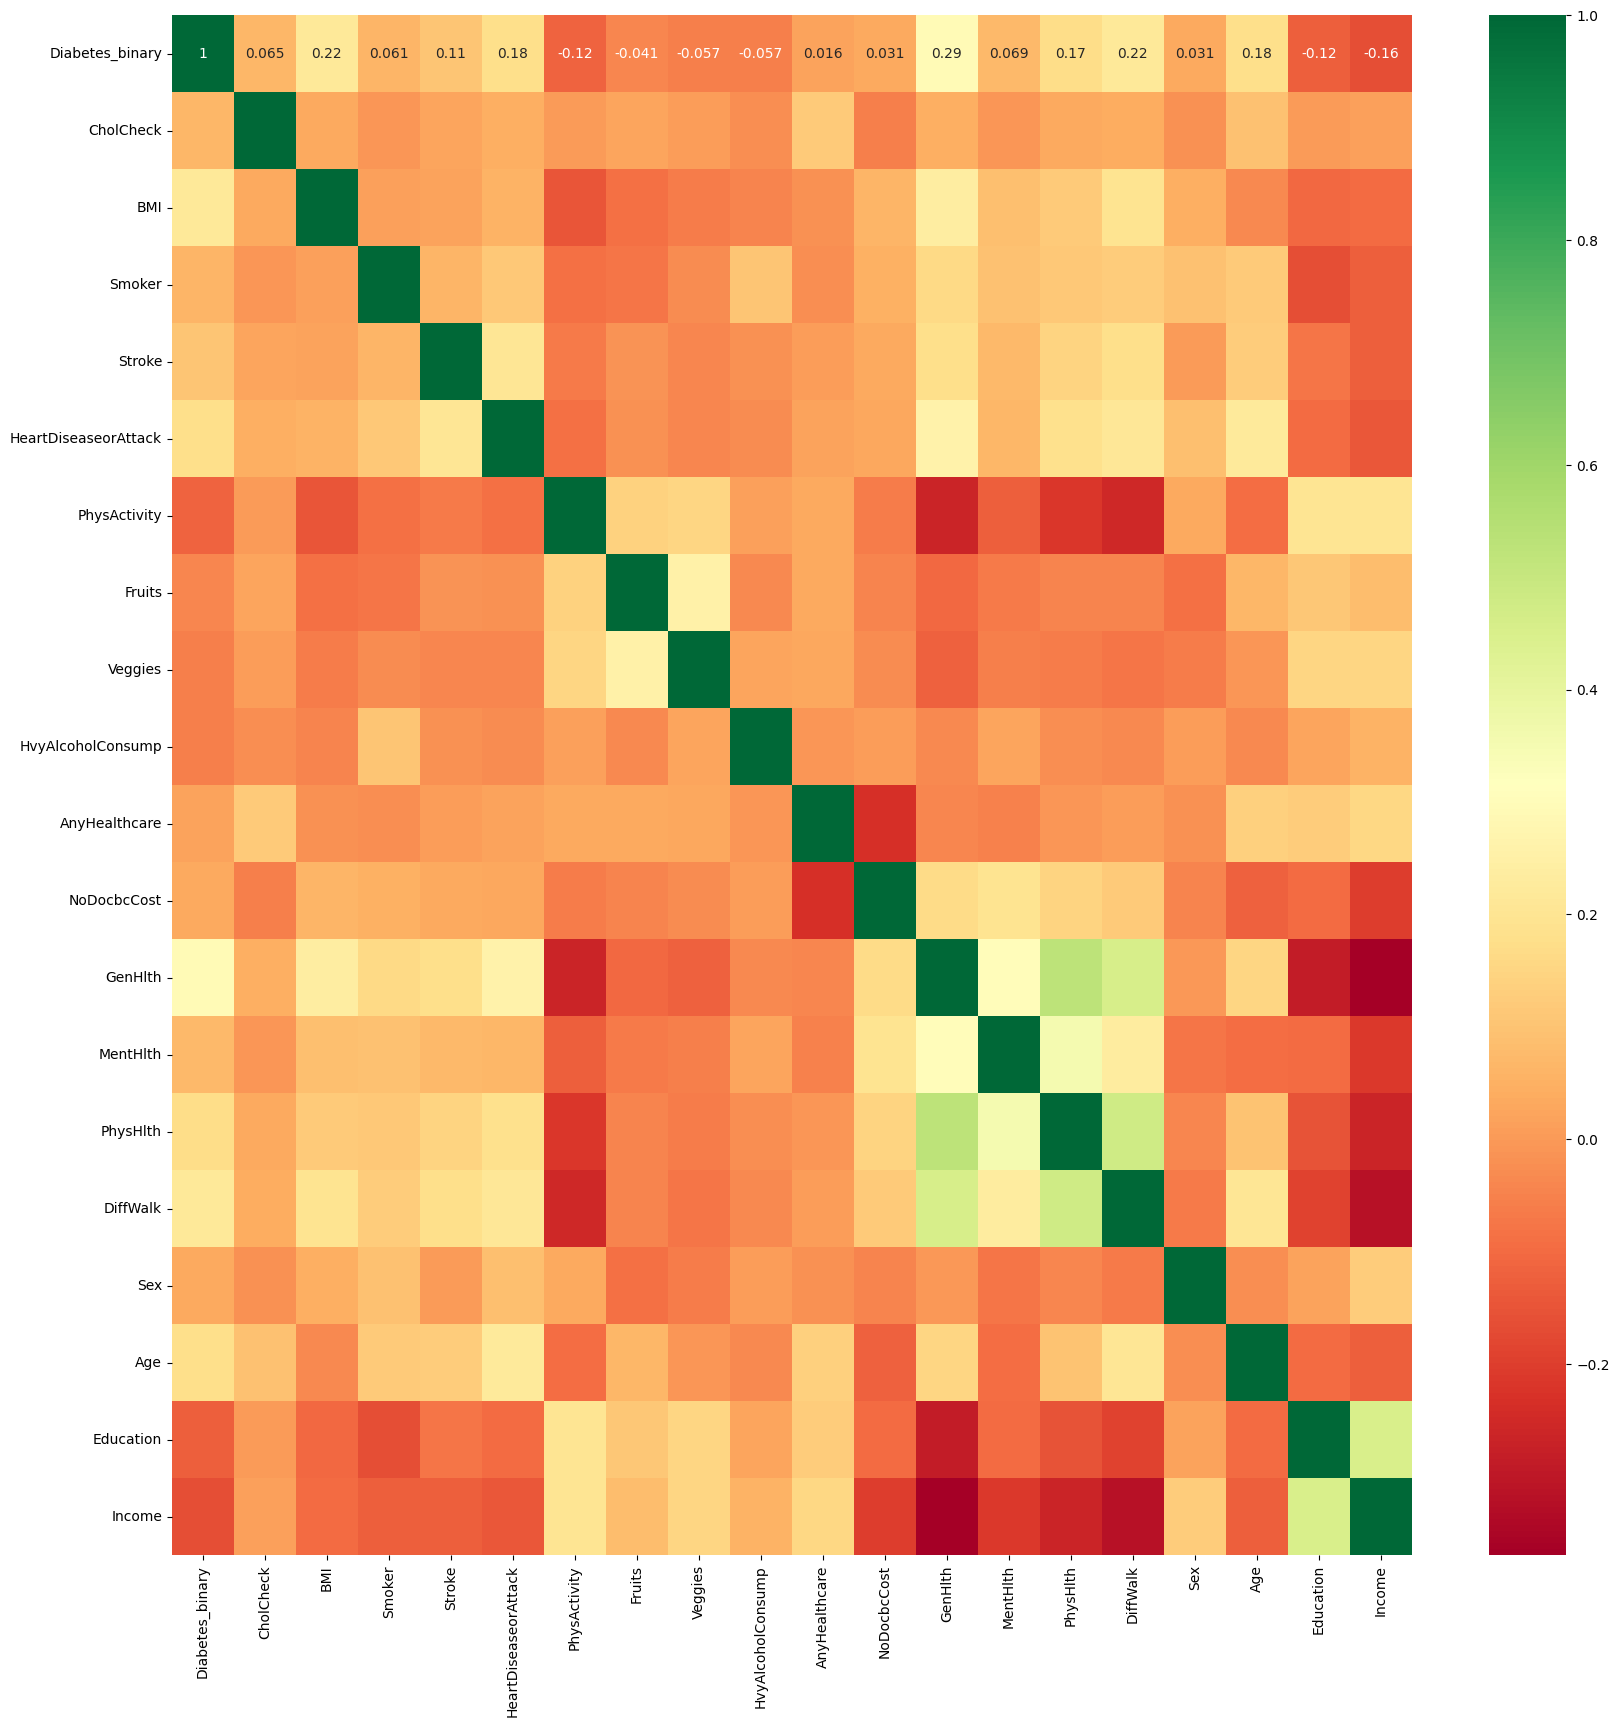

In [7]:
# plots for visualization
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<Axes: >

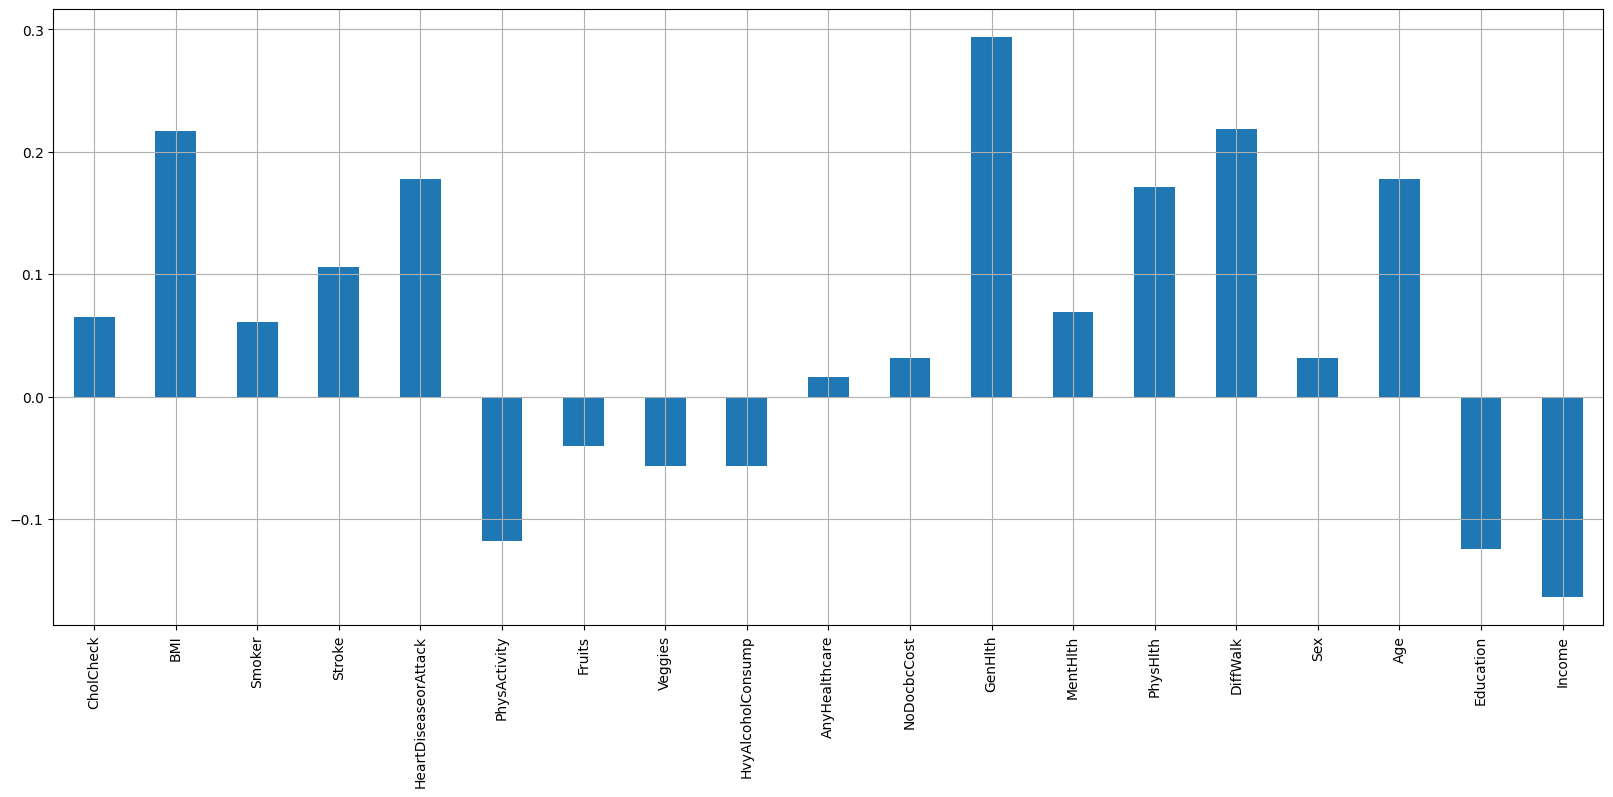

In [8]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8))

#### Analyzing columns with the highest correlations

In [9]:
(df.groupby('Diabetes_binary')['DiffWalk'].value_counts()/df.groupby('Diabetes_binary')['DiffWalk'].count()).round(4)*100

Diabetes_binary  DiffWalk
0.0              0.0         86.46
                 1.0         13.54
1.0              0.0         62.88
                 1.0         37.12
dtype: float64

On average, those with diabetes had serious difficulty walking or climbing stairs more. <br>
In individuals with diabetes (Diabetes_binary == 1.0), the occurrence of a heart disease or attack is 22.09%, whereas in those without diabetes, it is 7.34%. This suggests that individuals with diabetes are more likely to have heart disease or attack compared to those without diabetes.

In [10]:
df_no = df[df['Diabetes_binary'] == 0]
df_yes = df[df['Diabetes_binary'] == 1]
df_no_genhlth = df_no['GenHlth']
df_yes_genhlth = df_yes['GenHlth']

print(df_yes_genhlth.mean())
print(df_no_genhlth.mean())

3.290980591863294
2.3851850834043256


Those with diabetes rate their general health with 3.29, which is between 'good' and 'fair'.
Those without diabetes rater their general health with 2.39, which is between 'very good' and 'good'.

In [11]:
df_no = df[df['Diabetes_binary'] == 0]
df_yes = df[df['Diabetes_binary'] == 1]
df_no_physhlth = df_no['PhysHlth']
df_yes_physhlth = df_yes['PhysHlth']

print(df_yes_physhlth.mean())
print(df_no_physhlth.mean())

7.954478583149437
3.6410820119633223


The average number of days in the last 30 days during which individuals reported not feeling well in terms of physical health was 7.95 for those with diabetes and 3.64 for those without diabetes.

In [12]:
df.groupby('Diabetes_binary')['BMI'].describe().round()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,,,,,,,,
0.0,218334.0,28.0,6.0,12.0,24.0,27.0,31.0,98.0
1.0,35346.0,32.0,7.0,13.0,27.0,31.0,35.0,98.0


The average BMI is higher among individuals with diabetes compared to those without diabetes.

In [13]:
df_no = df[df['Diabetes_binary'] == 0]
df_yes = df[df['Diabetes_binary'] == 1]
df_no_age = df_no['Age']
df_yes_age = df_yes['Age']

print(df_yes_age.mean())
print(df_no_age.mean())

9.379052792395179
7.814064689878809


The average age for those with diabetes is around 60-64 years.
The average age for those without diabetes is 40-44 years.

# Visualising the data

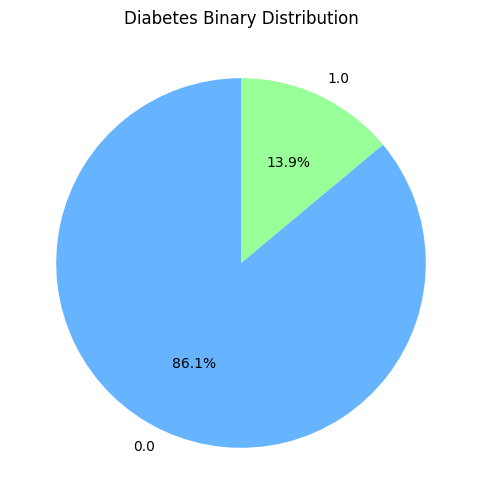

In [14]:
# we can see that the data is imbalanced
# we will fix it later
diabetes_counts = df['Diabetes_binary'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Diabetes Binary Distribution')
plt.show()

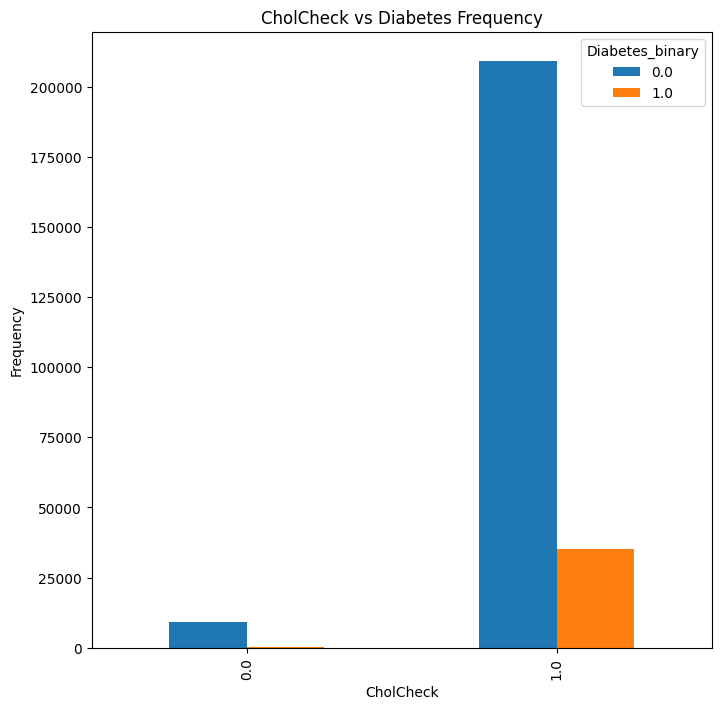

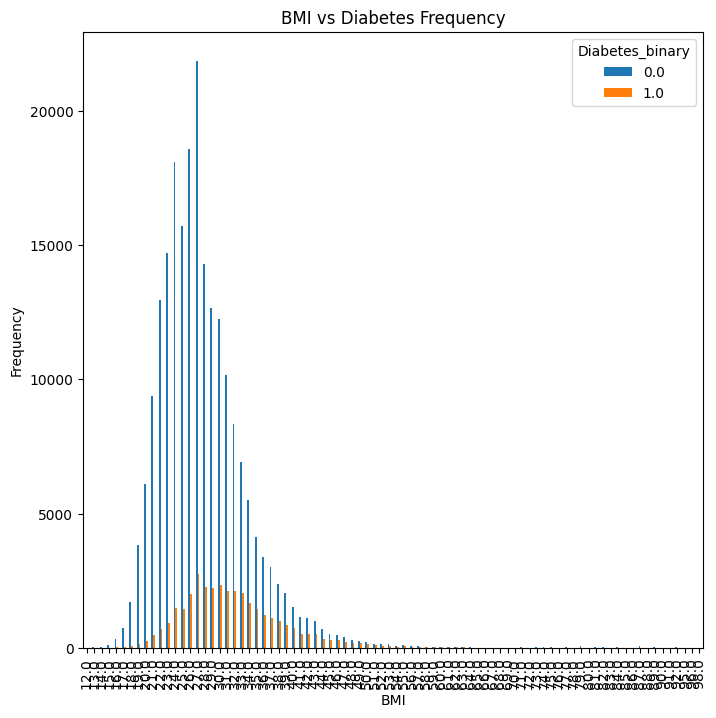

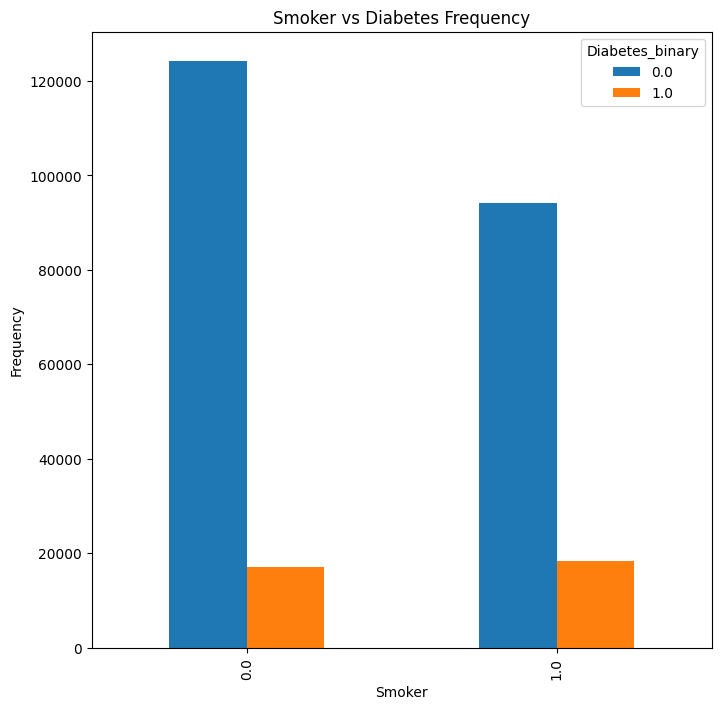

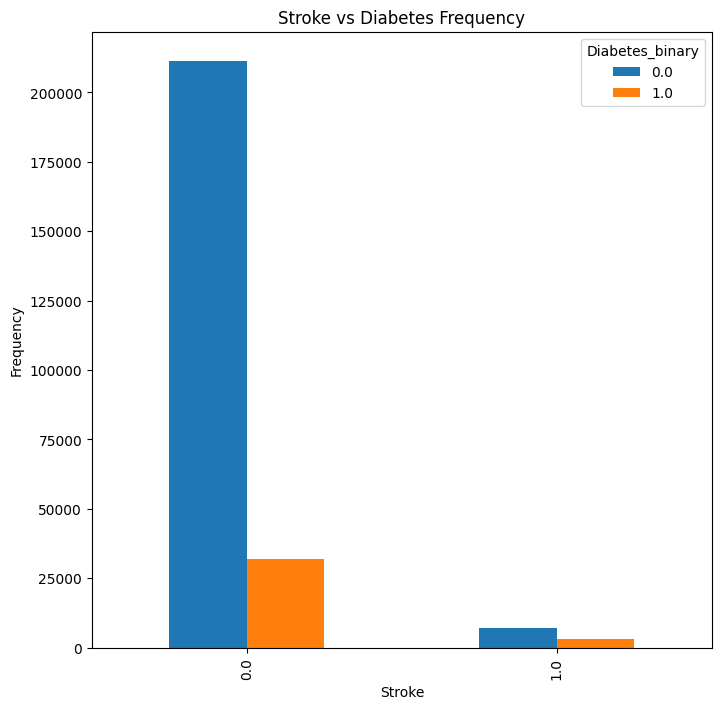

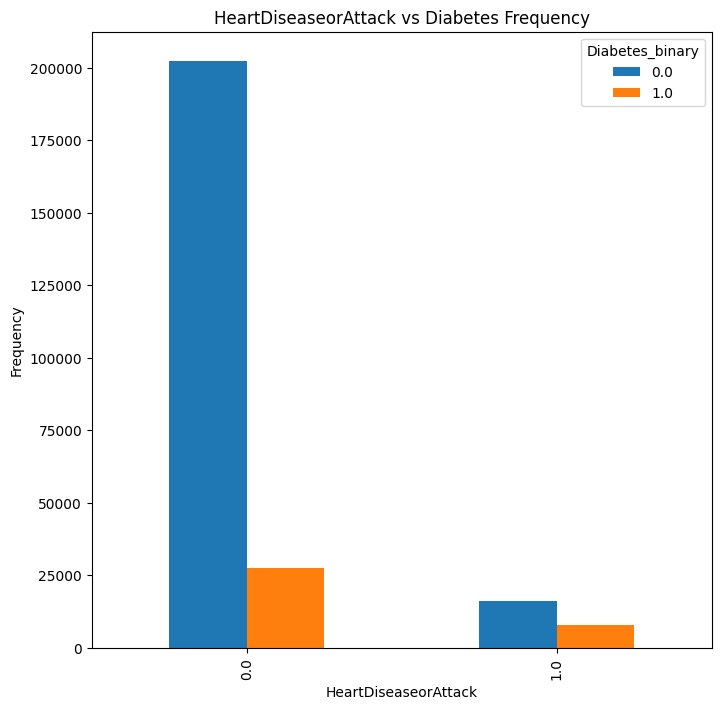

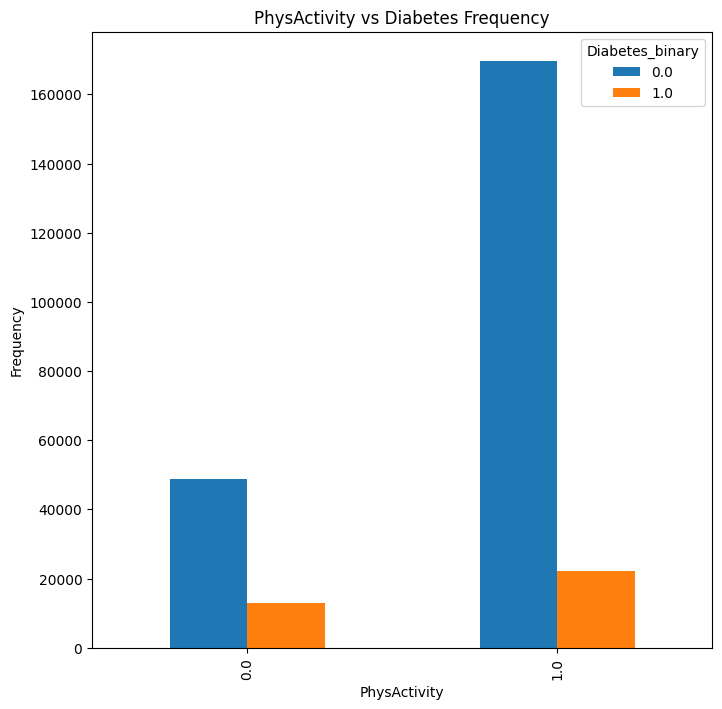

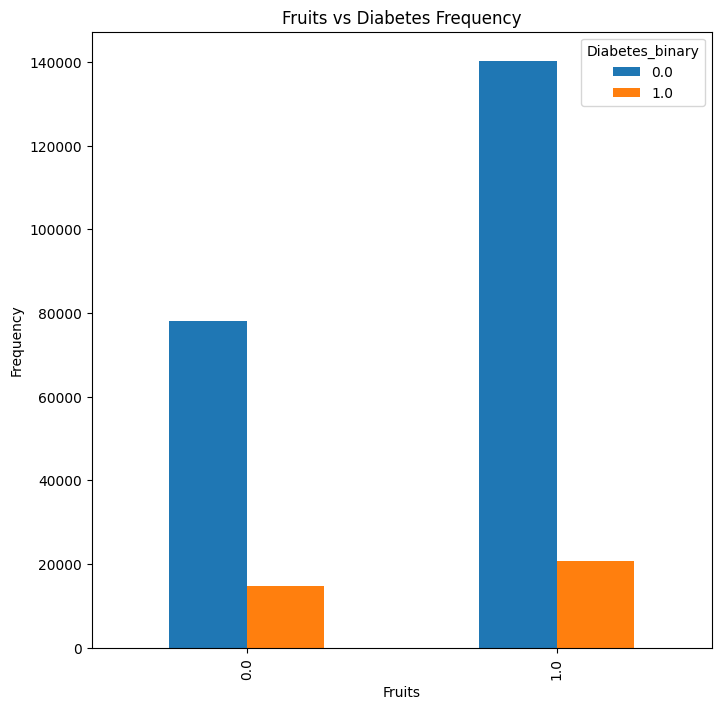

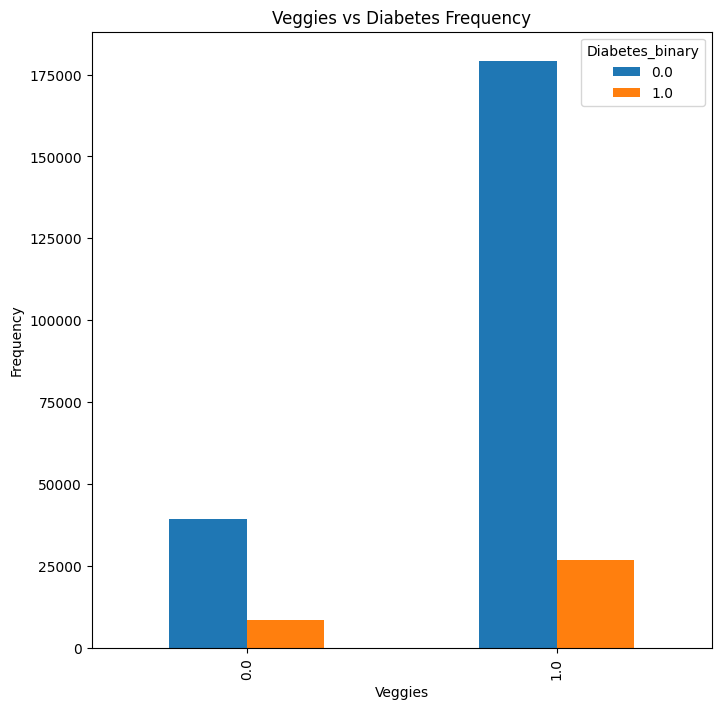

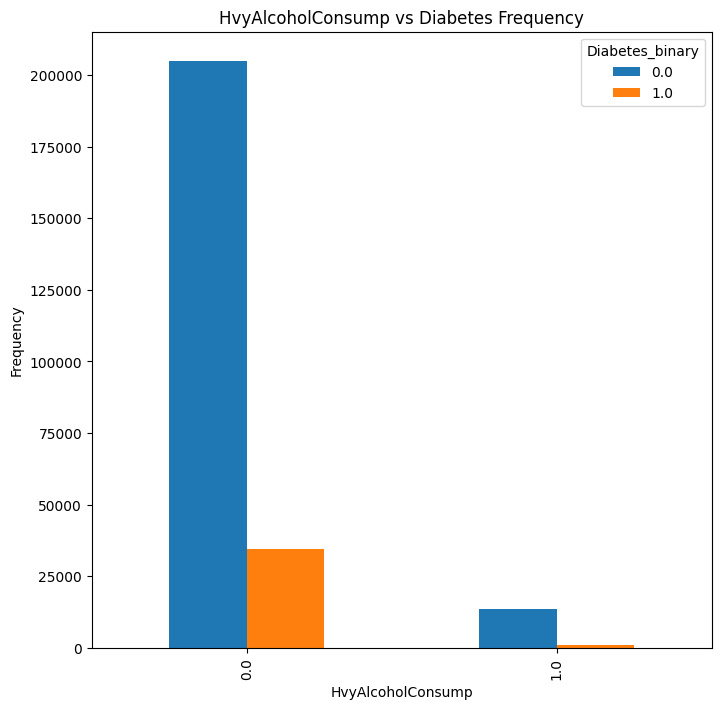

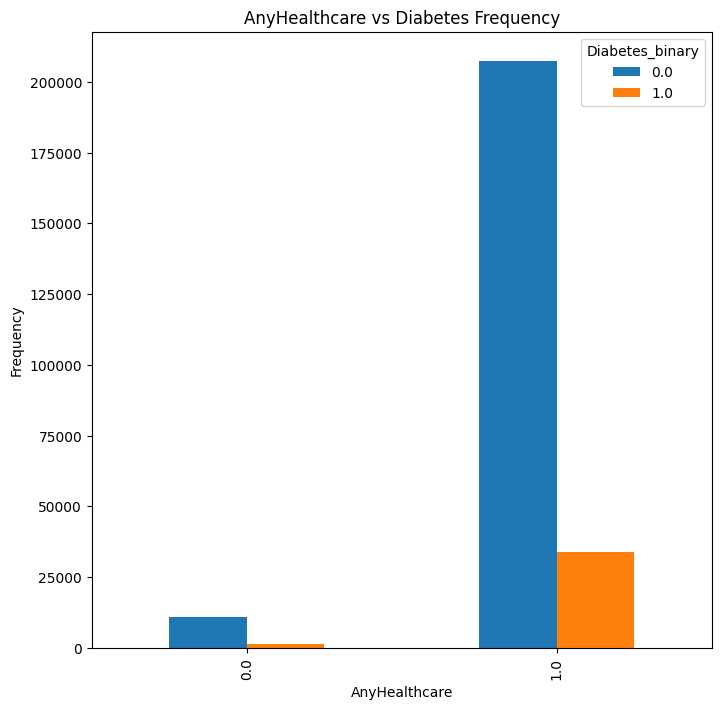

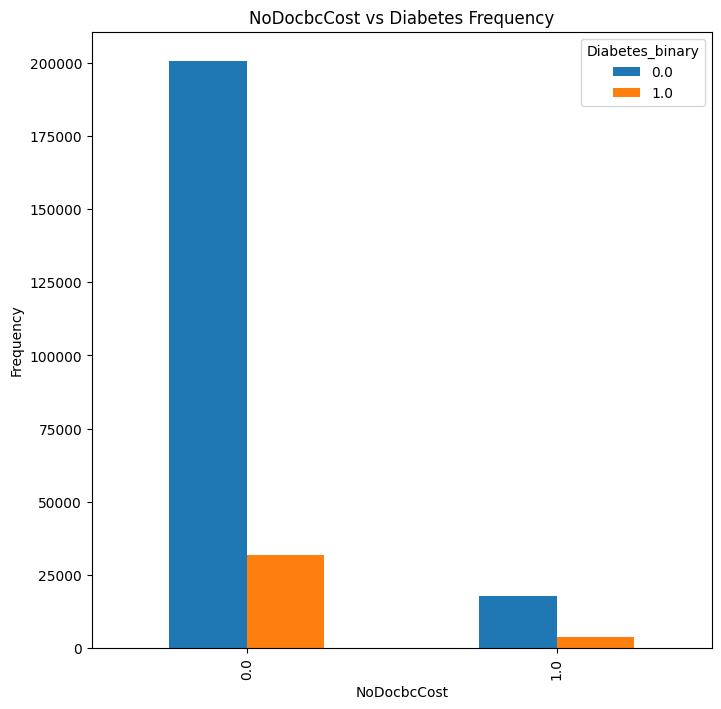

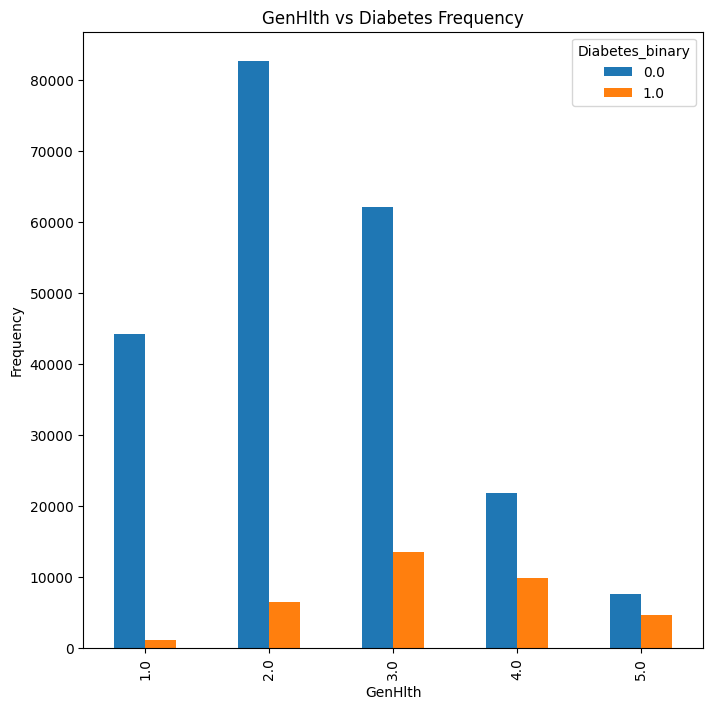

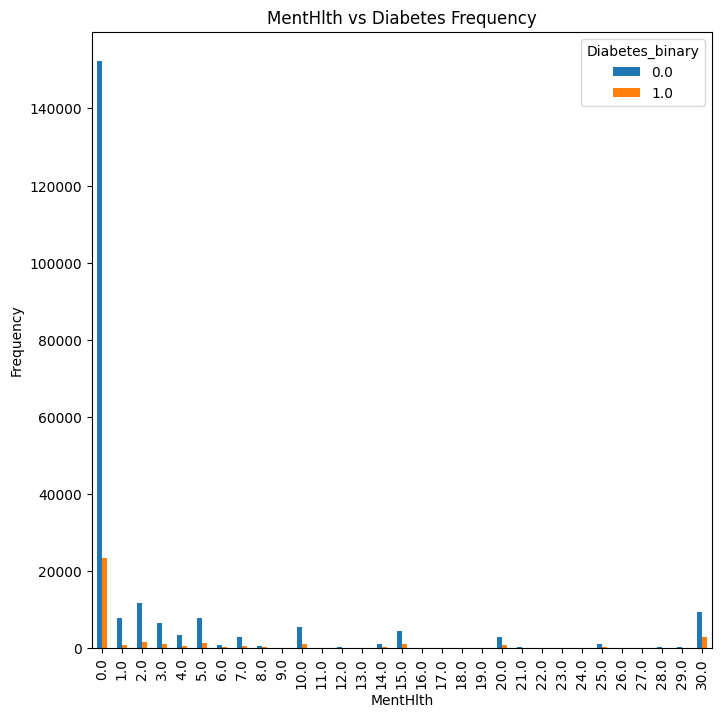

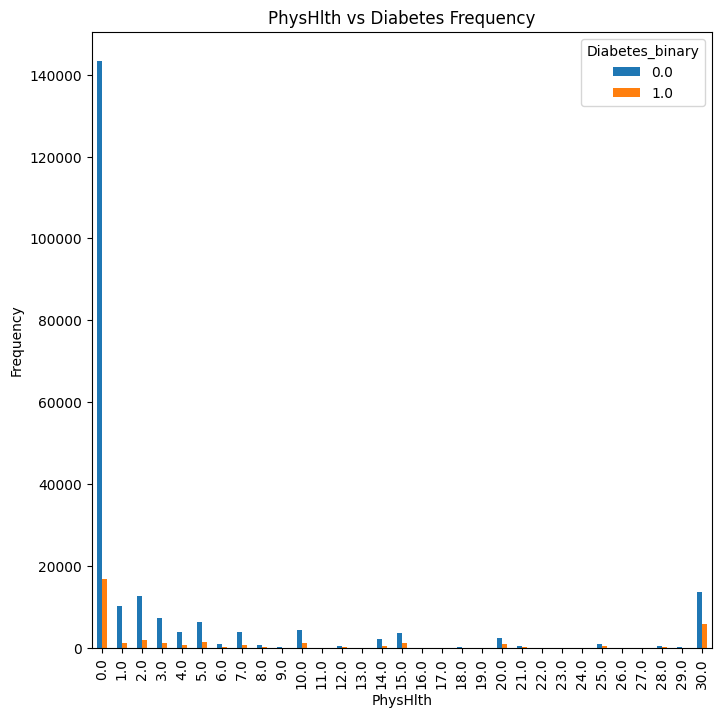

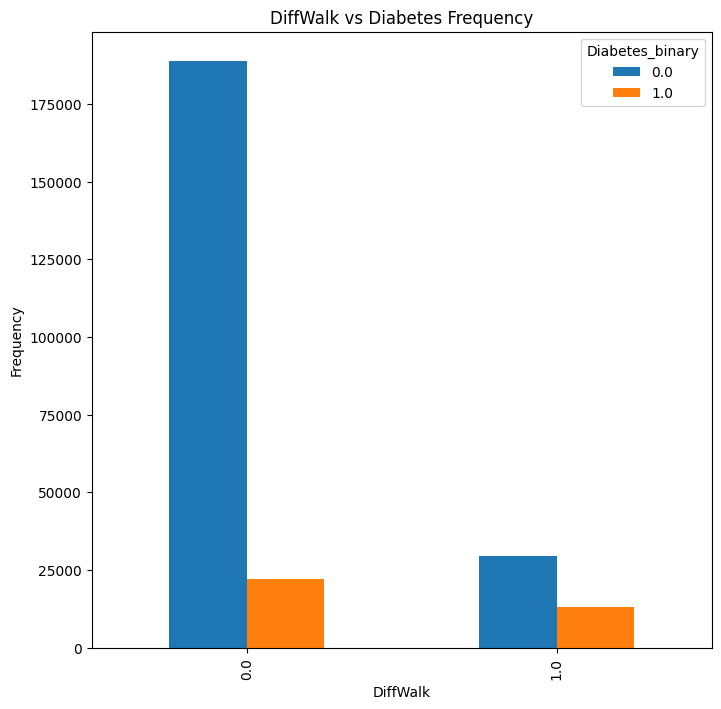

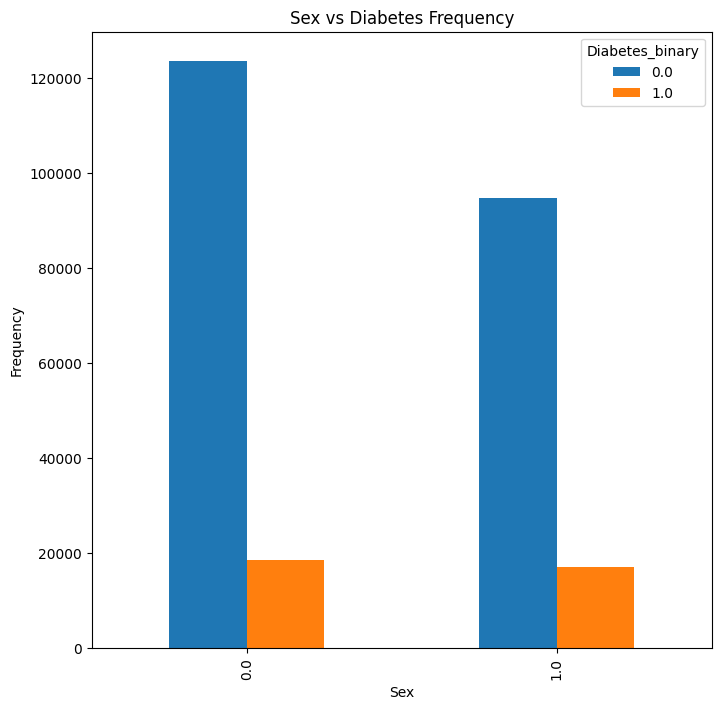

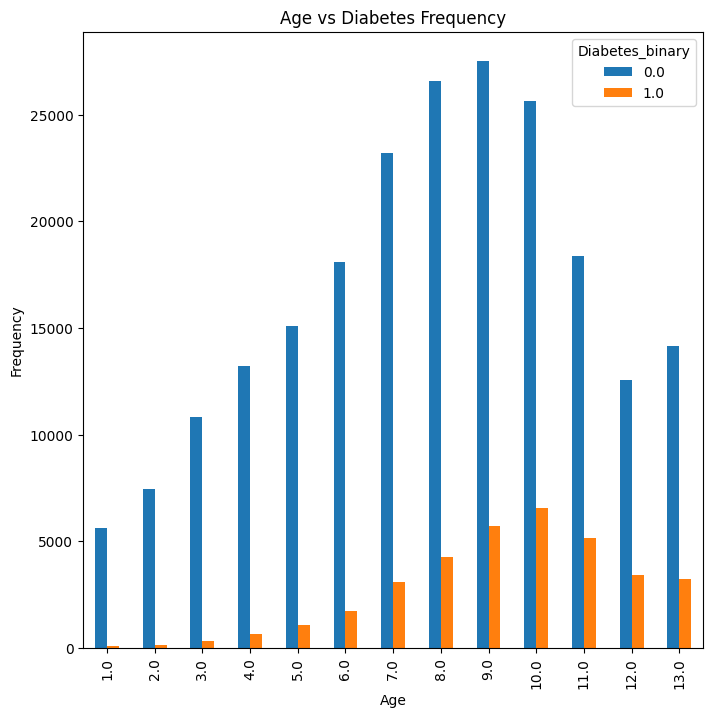

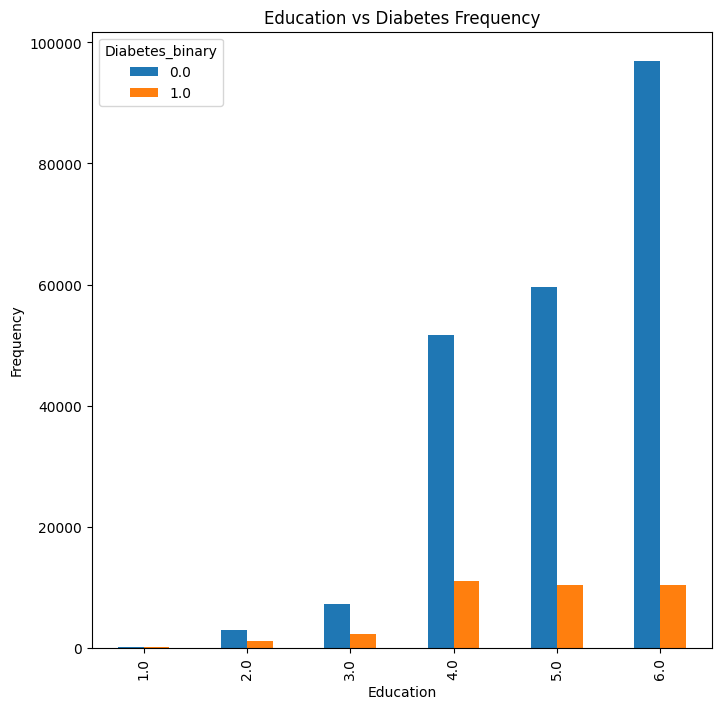

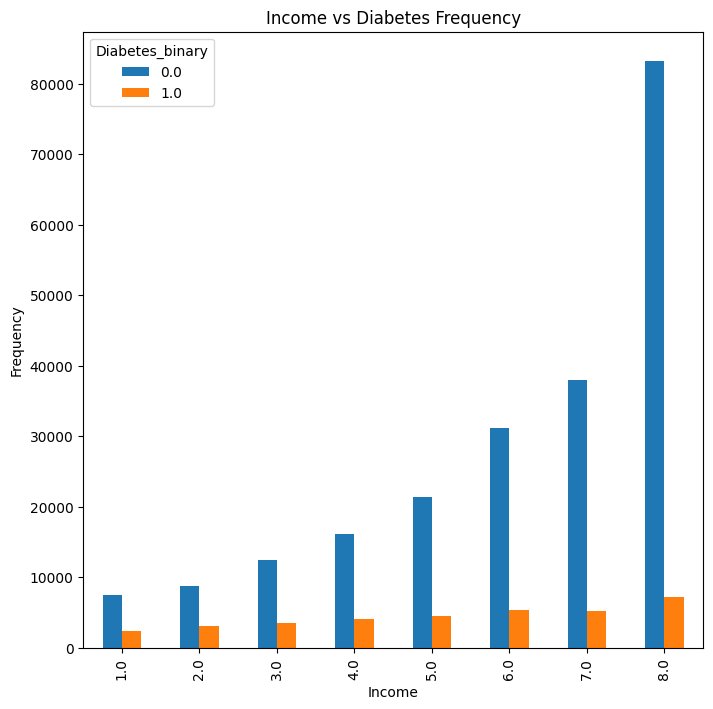

In [15]:
# plots to give us an over-all understanding of the data
for column in df.columns[1:]:
    
    crosstab = pd.crosstab(df[column], df['Diabetes_binary'])
    crosstab.plot(kind="bar", figsize=(8,8))
    plt.title(f'{column} vs Diabetes Frequency')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

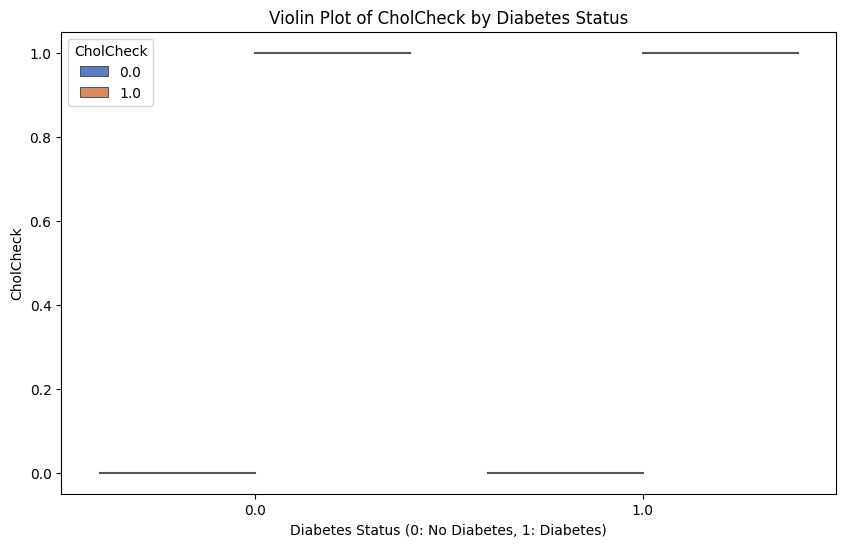

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

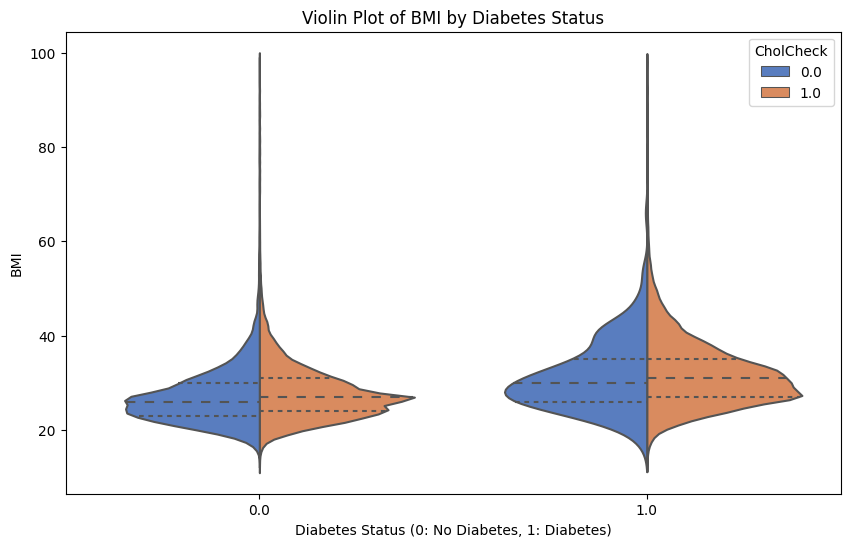

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

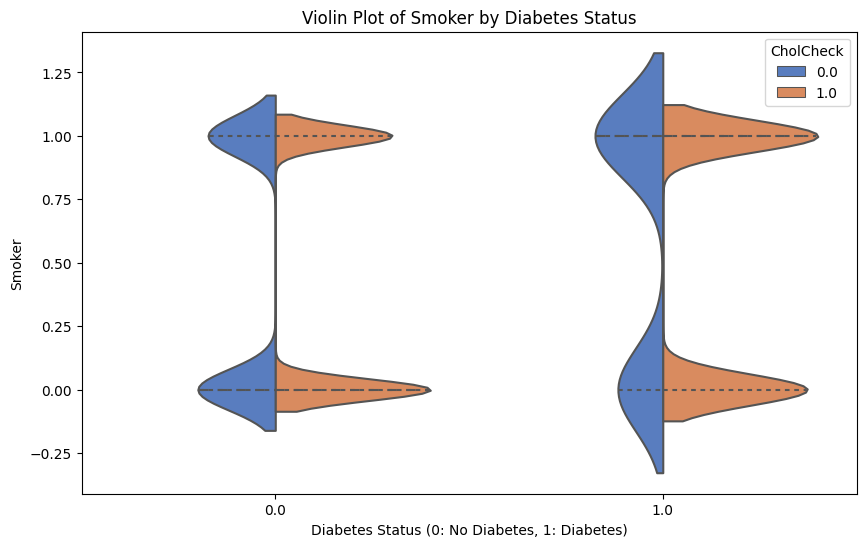

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

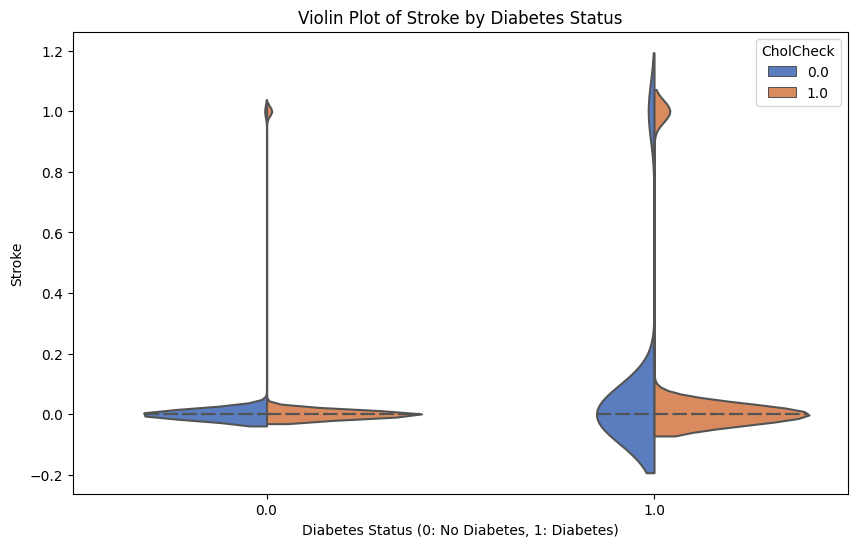

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

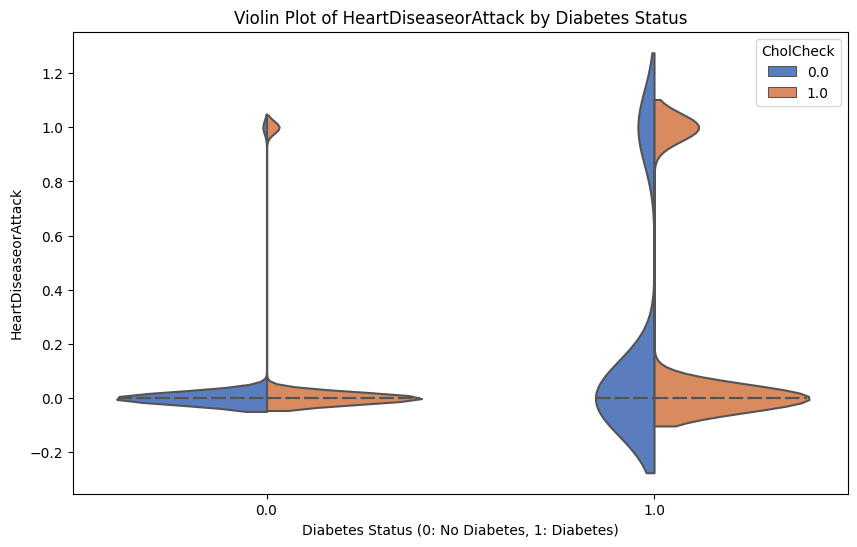

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

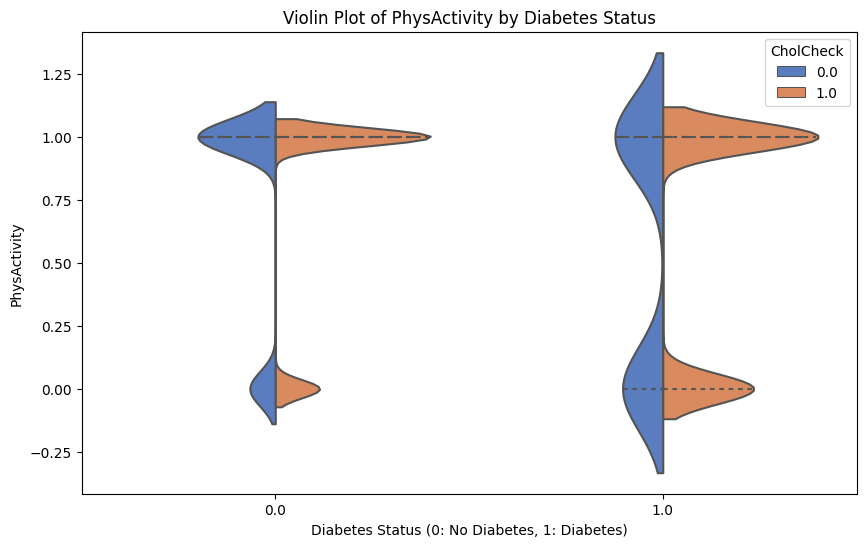

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

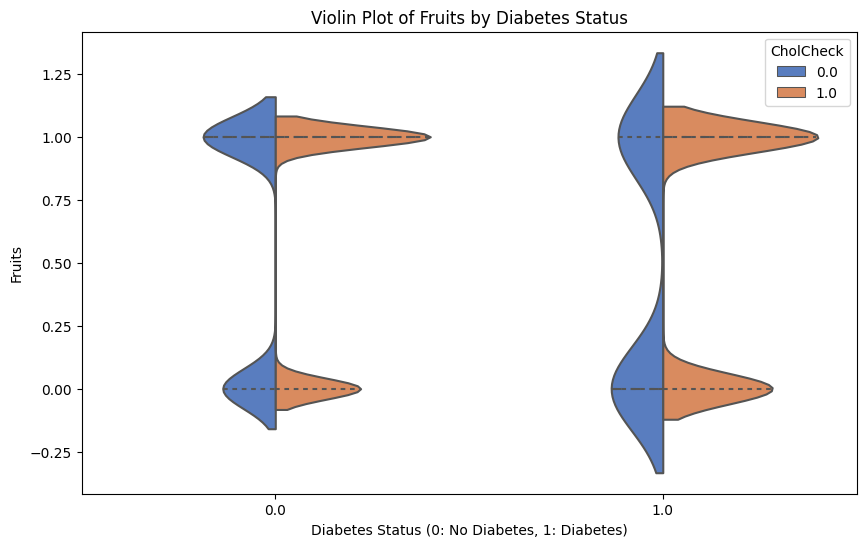

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

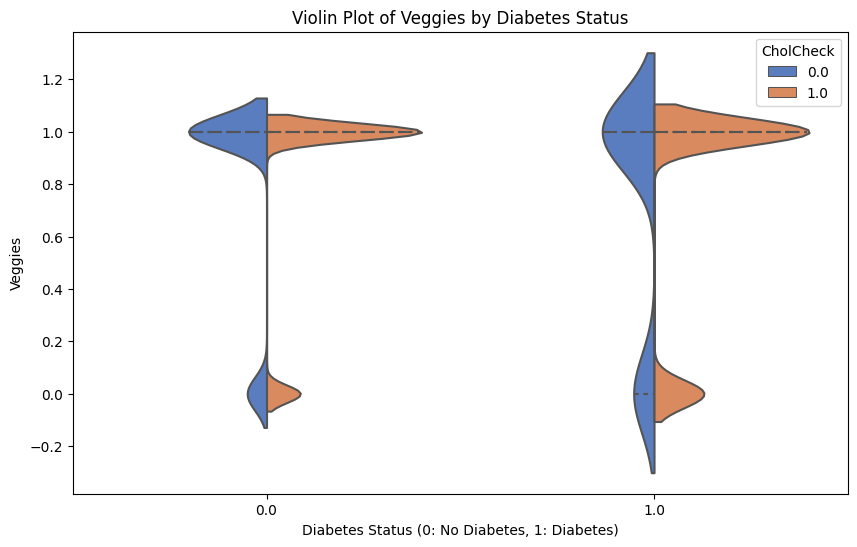

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

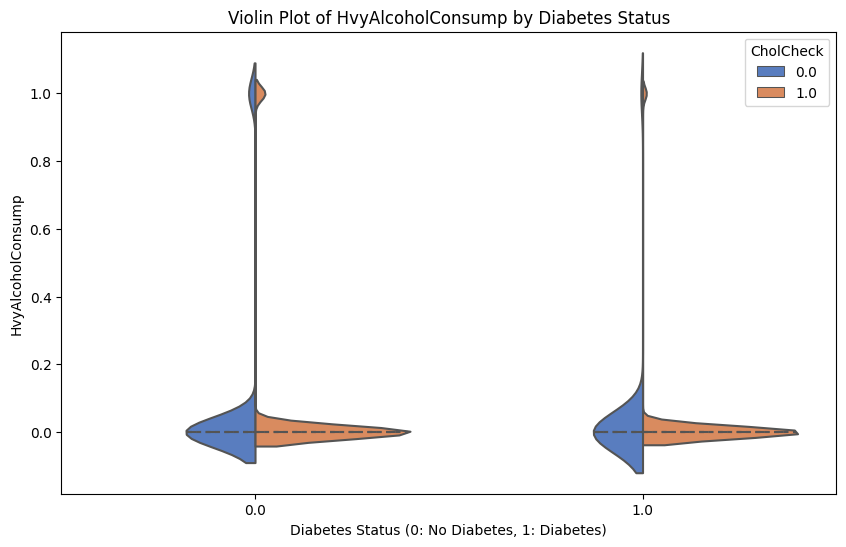

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

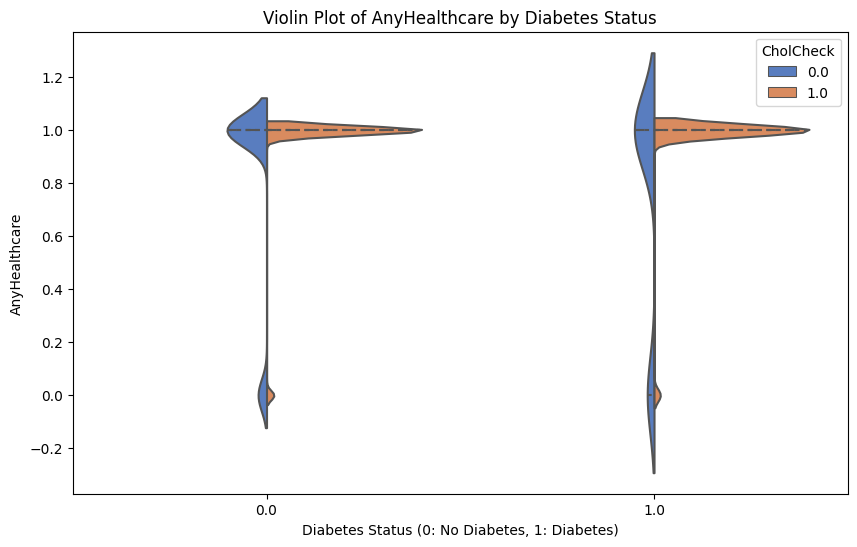

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

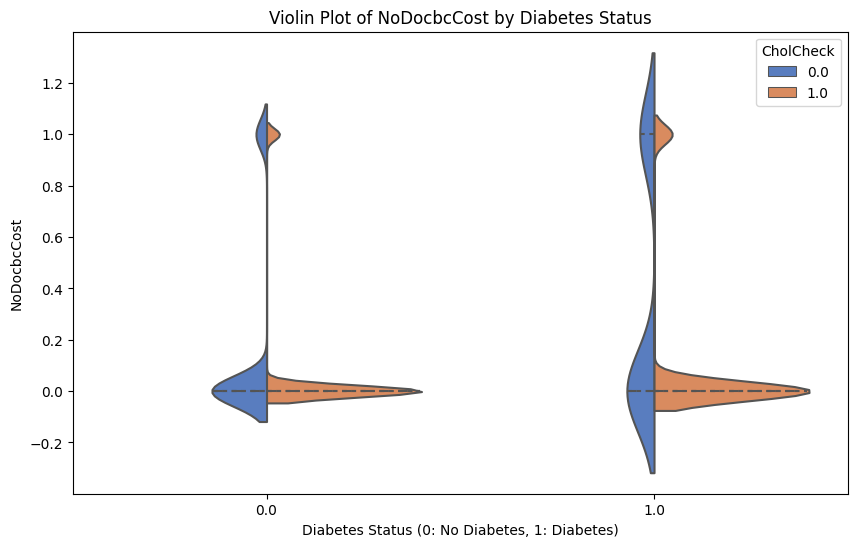

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

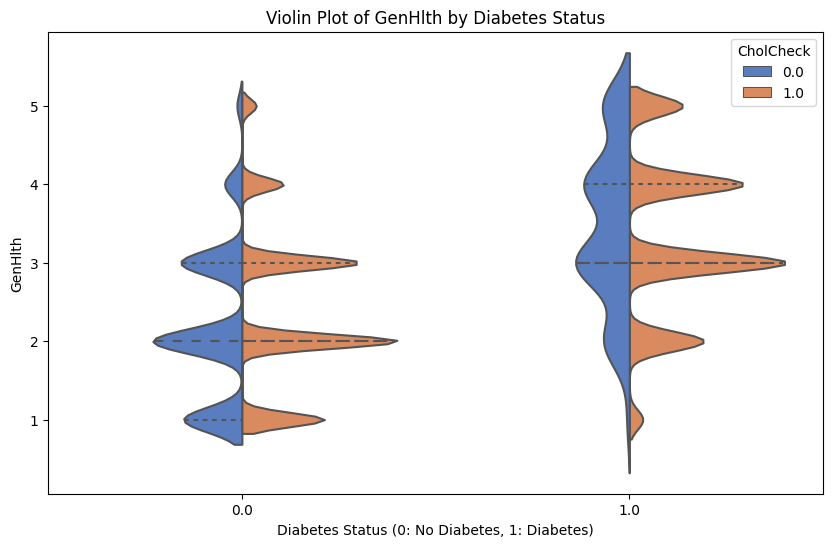

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

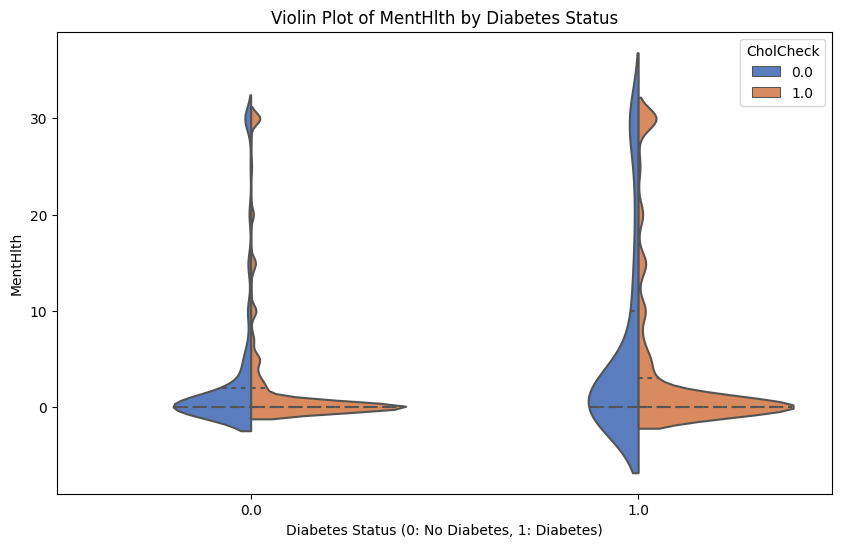

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

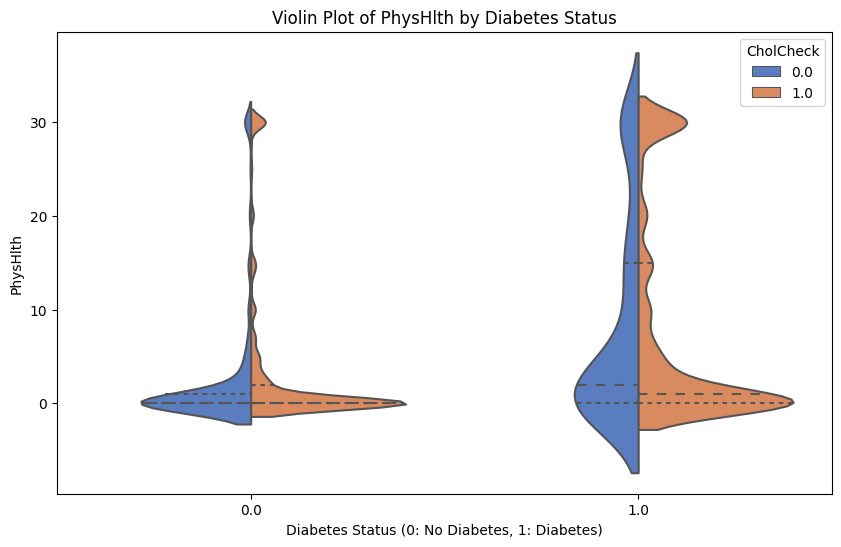

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

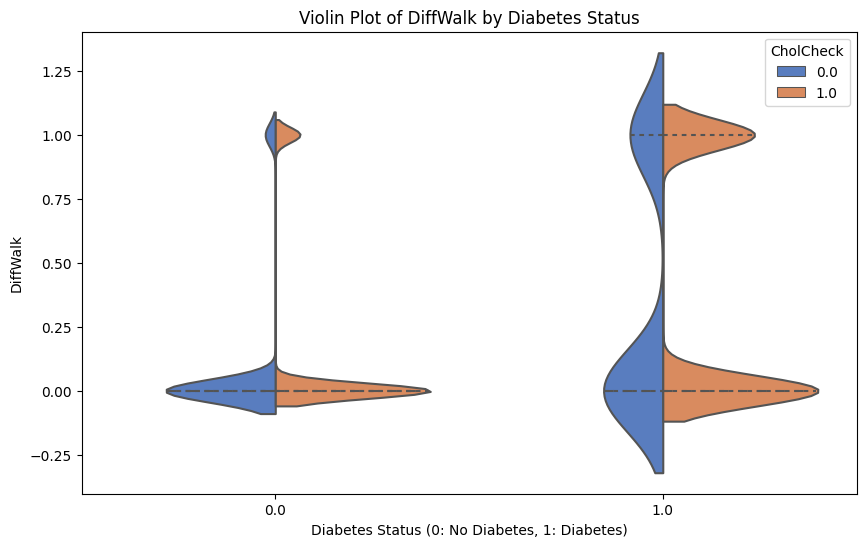

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

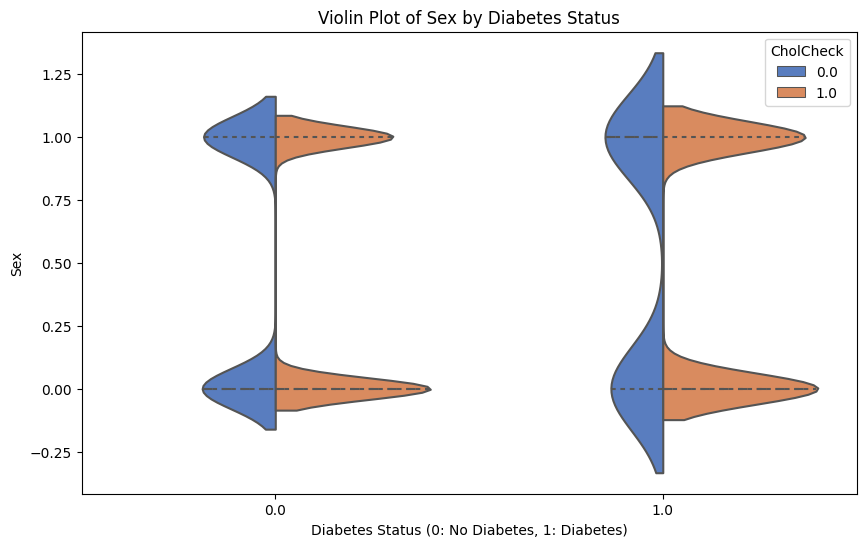

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

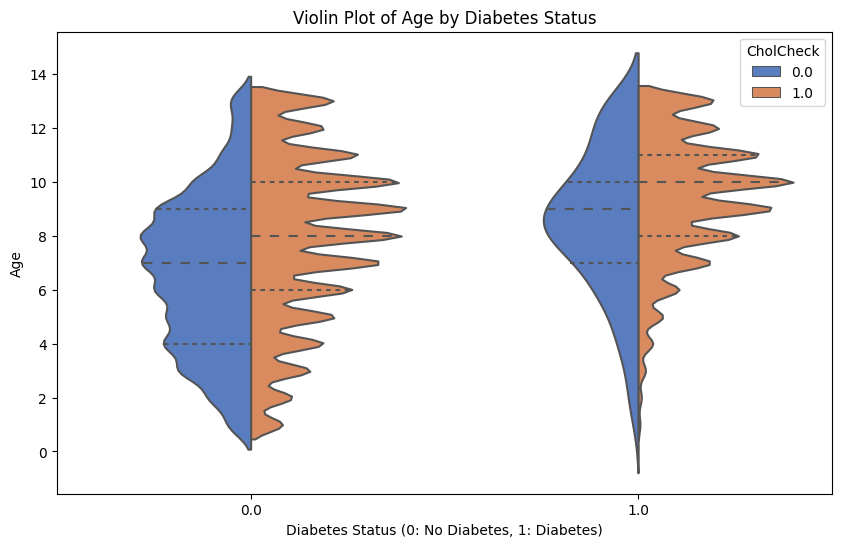

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

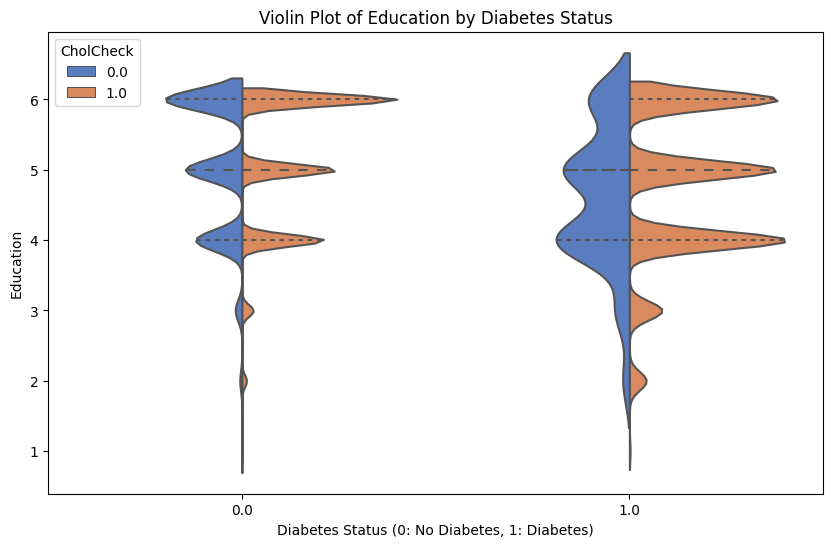

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

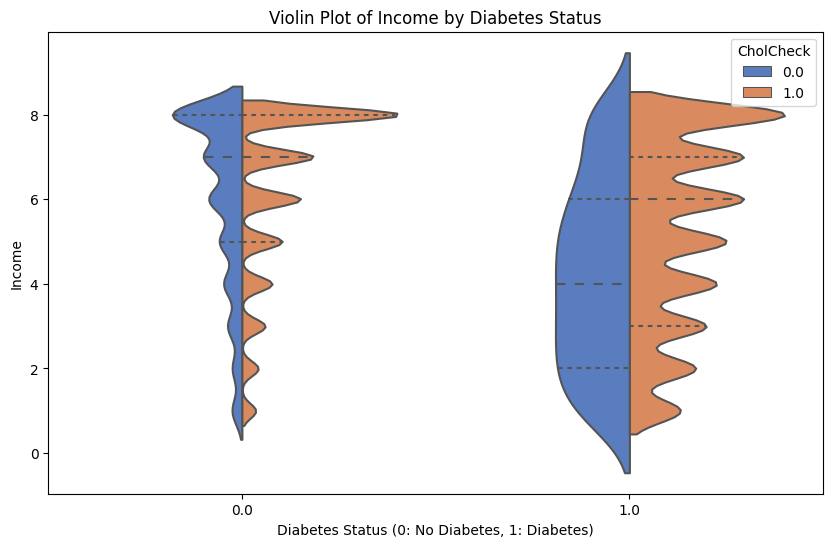

In [16]:
for feature in df.columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Diabetes_binary', y=feature, data=df, hue='CholCheck', split=True, inner='quartile', palette='muted')
    plt.title('Violin Plot of '+feature+' by Diabetes Status')
    plt.xlabel('Diabetes Status (0: No Diabetes, 1: Diabetes)')
    plt.ylabel(feature)
    plt.show()

# Splitting the train and test data

In [17]:
from sklearn.model_selection import train_test_split 
X_train = df.drop(columns=['Diabetes_binary']) 
y_train = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 5)


In [18]:
# function to see information about the given model
models = [LogisticRegression(), RandomForestClassifier(n_estimators=100, max_depth=10, random_state = 5), DecisionTreeClassifier()]
def info(models, X_train, y_train,X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
        print(f"Model: {type(model).__name__}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"AUC-ROC Score: {roc_auc:.4f}")
        print(f"Confusion Matrix:\n{confusion}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {fscore:.4f}")
        print(classification_report(y_test,y_pred))
        print("\n")


In [19]:
def ROC_curve(models, X_train, y_train,X_test, y_test):
    plt.figure(figsize=(8, 8))
    for model in models:
        model.fit(X_train, y_train)
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.8618
AUC-ROC Score: 0.5465
Confusion Matrix:
[[42947   781]
 [ 6231   777]]
Precision: 0.4987
Recall: 0.1109
F1 Score: 0.1814
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     43728
         1.0       0.50      0.11      0.18      7008

    accuracy                           0.86     50736
   macro avg       0.69      0.55      0.55     50736
weighted avg       0.82      0.86      0.82     50736



Model: RandomForestClassifier
Accuracy: 0.8646
AUC-ROC Score: 0.5263
Confusion Matrix:
[[43454   274]
 [ 6595   413]]
Precision: 0.6012
Recall: 0.0589
F1 Score: 0.1073
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43728
         1.0       0.60      0.06      0.11      7008

    accuracy                           0.86     50736
   macro avg       0.73      0.53      0.52     50736
weighted avg       0.83      0.86      0.81     50736



Model: Dec

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


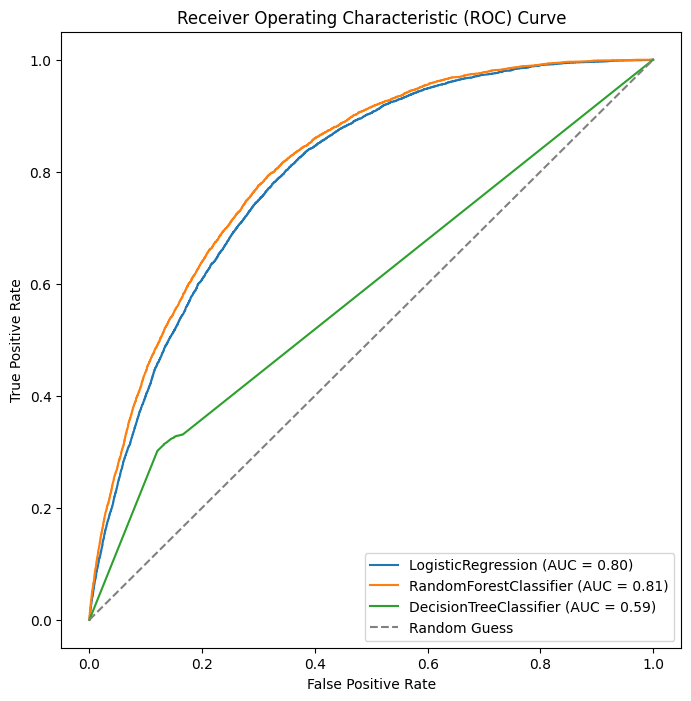

In [20]:
# we can see here that the accuracy is high but the model really isn't good because it's not balanced.
# (It tends to mostly predict that a person doesn't have diabetes)
info(models, X_train, y_train, X_test, y_test)
ROC_curve(models, X_train, y_train,X_test, y_test)

# Balancing the data
We tried different techniques but found undersampling 2 to be the best.

#### Undersampling

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.7145
AUC-ROC Score: 0.7237
Confusion Matrix:
[[31089 12639]
 [ 1847  5161]]
Precision: 0.2899
Recall: 0.7364
F1 Score: 0.4161
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     43728
         1.0       0.29      0.74      0.42      7008

    accuracy                           0.71     50736
   macro avg       0.62      0.72      0.61     50736
weighted avg       0.85      0.71      0.76     50736



Model: RandomForestClassifier
Accuracy: 0.7044
AUC-ROC Score: 0.7366
Confusion Matrix:
[[30267 13461]
 [ 1535  5473]]
Precision: 0.2891
Recall: 0.7810
F1 Score: 0.4219
              precision    recall  f1-score   support

         0.0       0.95      0.69      0.80     43728
         1.0       0.29      0.78      0.42      7008

    accuracy                           0.70     50736
   macro avg       0.62      0.74      0.61     50736
weighted avg       0.86      0.70      0.75     50736



Model: Dec

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


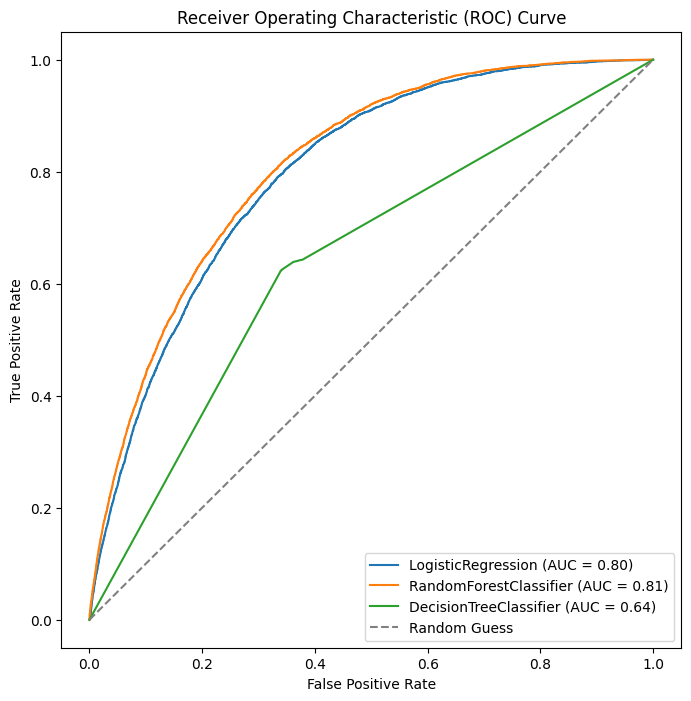

In [21]:
rus = RandomUnderSampler(random_state = 5)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

info(models, X_undersampled, y_undersampled, X_test, y_test)
ROC_curve(models, X_undersampled, y_undersampled, X_test, y_test)

#### Oversampling using RandomOverSampler

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.7182
AUC-ROC Score: 0.7230
Confusion Matrix:
[[31329 12399]
 [ 1896  5112]]
Precision: 0.2919
Recall: 0.7295
F1 Score: 0.4170
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81     43728
         1.0       0.29      0.73      0.42      7008

    accuracy                           0.72     50736
   macro avg       0.62      0.72      0.62     50736
weighted avg       0.85      0.72      0.76     50736



Model: RandomForestClassifier
Accuracy: 0.7119
AUC-ROC Score: 0.7356
Confusion Matrix:
[[30736 12992]
 [ 1624  5384]]
Precision: 0.2930
Recall: 0.7683
F1 Score: 0.4242
              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81     43728
         1.0       0.29      0.77      0.42      7008

    accuracy                           0.71     50736
   macro avg       0.62      0.74      0.62     50736
weighted avg       0.86      0.71      0.75     50736



Model: Dec

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


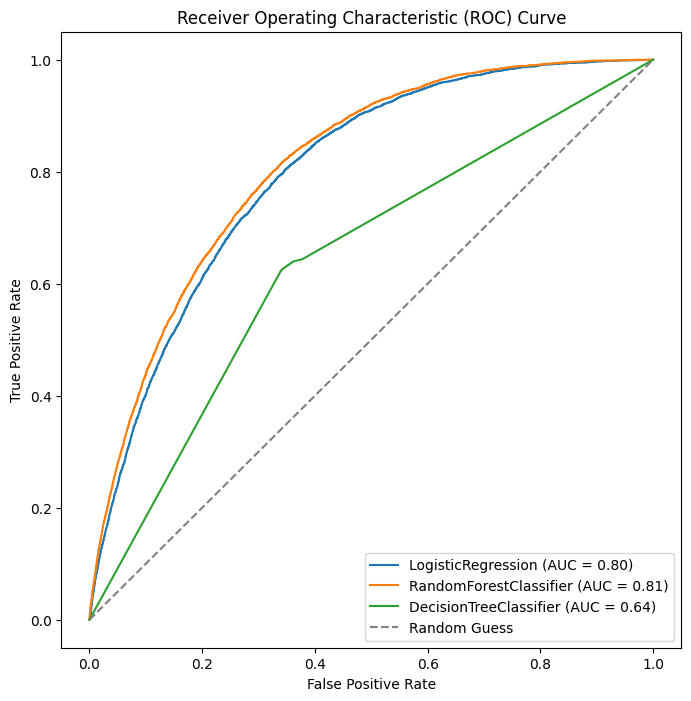

In [22]:
ros = RandomOverSampler(random_state = 5)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

info(models, X_oversampled, y_oversampled, X_test, y_test)
ROC_curve(models, X_undersampled, y_undersampled, X_test, y_test)

#### Oversampling using smote

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.7166
AUC-ROC Score: 0.7186
Confusion Matrix:
[[31301 12427]
 [ 1952  5056]]
Precision: 0.2892
Recall: 0.7215
F1 Score: 0.4129
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81     43728
         1.0       0.29      0.72      0.41      7008

    accuracy                           0.72     50736
   macro avg       0.62      0.72      0.61     50736
weighted avg       0.85      0.72      0.76     50736



Model: RandomForestClassifier
Accuracy: 0.8023
AUC-ROC Score: 0.6876
Confusion Matrix:
[[36995  6733]
 [ 3300  3708]]
Precision: 0.3551
Recall: 0.5291
F1 Score: 0.4250
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88     43728
         1.0       0.36      0.53      0.43      7008

    accuracy                           0.80     50736
   macro avg       0.64      0.69      0.65     50736
weighted avg       0.84      0.80      0.82     50736



Model: Dec

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


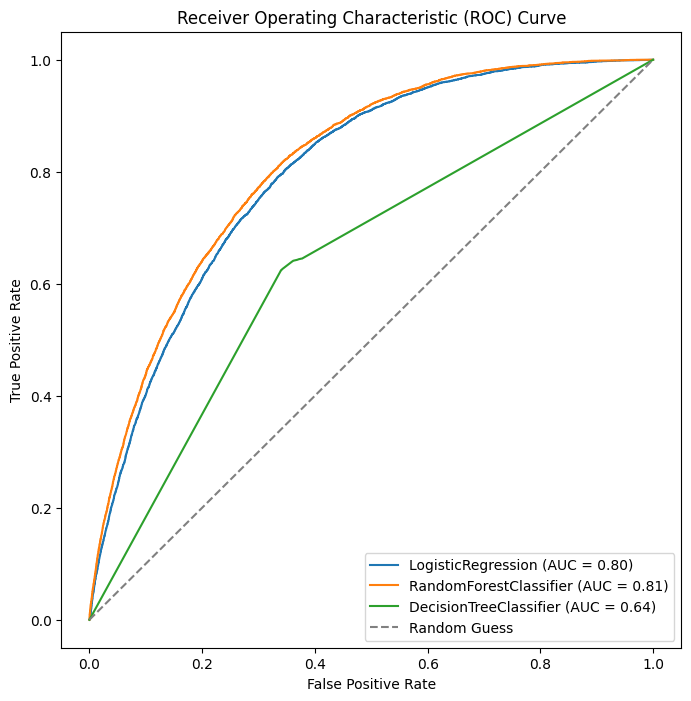

In [23]:
smote = SMOTE(random_state = 5)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
info(models, X_smote, y_smote, X_test, y_test)
ROC_curve(models, X_undersampled, y_undersampled, X_test, y_test)

#### Undersampling 2

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.7277
AUC-ROC Score: 0.7276
Confusion Matrix:
[[5031 2002]
 [1848 5258]]
Precision: 0.7242
Recall: 0.7399
F1 Score: 0.7320
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.72      7033
         1.0       0.72      0.74      0.73      7106

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



Model: RandomForestClassifier
Accuracy: 0.7394
AUC-ROC Score: 0.7392
Confusion Matrix:
[[4872 2161]
 [1523 5583]]
Precision: 0.7209
Recall: 0.7857
F1 Score: 0.7519
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      7033
         1.0       0.72      0.79      0.75      7106

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



Model: DecisionTre

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


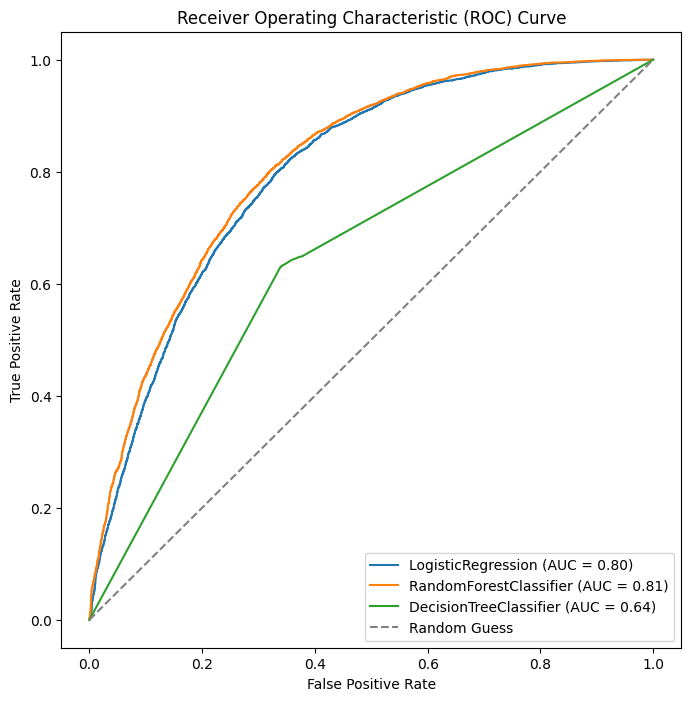

In [24]:
# This method is inspired by how the owner of the Kaggle dataset that we are using balanced their data
positive = df['Diabetes_binary'] == 1
positive_data = df[positive]
pos_cases = len(positive_data)

negative = df['Diabetes_binary'] == 0
negative_data = df[negative] 

random_neg = negative_data.take(np.random.permutation(len(negative_data))[:pos_cases])


# data is now our balanced dataset
data = pd.concat([random_neg, positive_data], ignore_index=True)

X_train = data.drop(columns=['Diabetes_binary'])
y_train = data['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 5)

info(models, X_train, y_train, X_test, y_test)
ROC_curve(models, X_train, y_train, X_test, y_test)

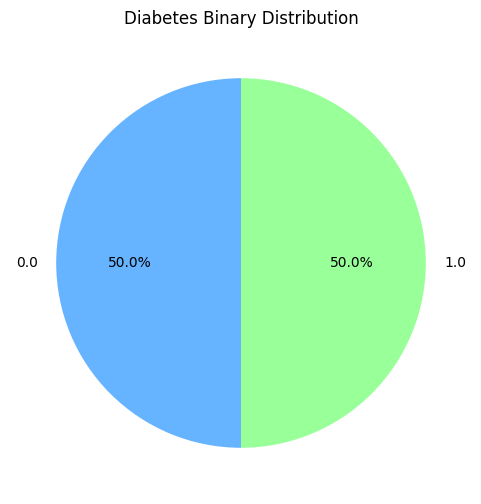

In [25]:
# We can see that now the data is balanced
diabetes_counts = data['Diabetes_binary'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Diabetes Binary Distribution')
plt.show()

# Trying different feature selection techniques


Irrelevant or partially relevant features can negatively impact model performance. 

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

1. Getting the top 10 features with every selection technique
2. Seeing sepretly how accurate the model is with only the selected ten features
3.  Seeing how accurate it is with the overlaping features

#### Unvariate selection

In [26]:
selector = SelectKBest(score_func=f_classif, k=10) 
X_train_selected = selector.fit_transform(X_train, y_train)
US_selected_features = X_train.columns[selector.get_support()]
print("Selected features:", US_selected_features)

Selected features: Index(['BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')


In [27]:
# splitting unvariate selection
data_US = pd.concat([y_train, X_train[US_selected_features]], axis=1)

X_train_US = data_US.drop(columns=['Diabetes_binary'])
y_train_US = data_US['Diabetes_binary']

X_train_US, X_test_US, y_train_US, y_test_US = train_test_split(X_train_US, y_train_US, test_size = 0.2, random_state = 5)

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.7243
AUC-ROC Score: 0.7244
Confusion Matrix:
[[4142 1608]
 [1510 4051]]
Precision: 0.7159
Recall: 0.7285
F1 Score: 0.7221
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73      5750
         1.0       0.72      0.73      0.72      5561

    accuracy                           0.72     11311
   macro avg       0.72      0.72      0.72     11311
weighted avg       0.72      0.72      0.72     11311



Model: RandomForestClassifier
Accuracy: 0.7305
AUC-ROC Score: 0.7312
Confusion Matrix:
[[3988 1762]
 [1286 4275]]
Precision: 0.7081
Recall: 0.7687
F1 Score: 0.7372
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      5750
         1.0       0.71      0.77      0.74      5561

    accuracy                           0.73     11311
   macro avg       0.73      0.73      0.73     11311
weighted avg       0.73      0.73      0.73     11311



Model: DecisionTre

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


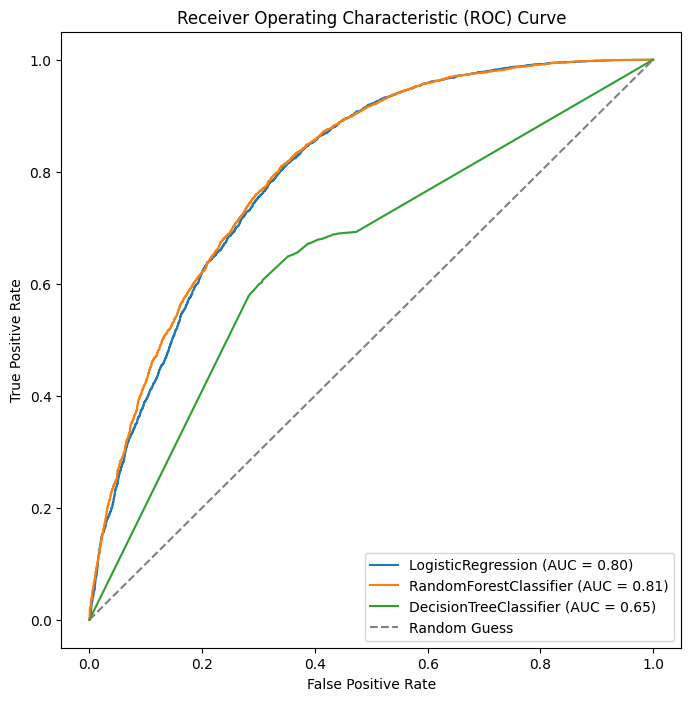

In [28]:
info(models, X_train_US,y_train_US, X_test_US, y_test_US)
ROC_curve(models, X_train_US,y_train_US, X_test_US, y_test_US)

#### Feature importance 

[0.01641303 0.20444743 0.00553252 0.00921942 0.04018448 0.00991765
 0.00480987 0.00497484 0.01026614 0.00332445 0.00377358 0.31993318
 0.01495998 0.04106034 0.07896046 0.01181949 0.16558592 0.01883683
 0.03598038]


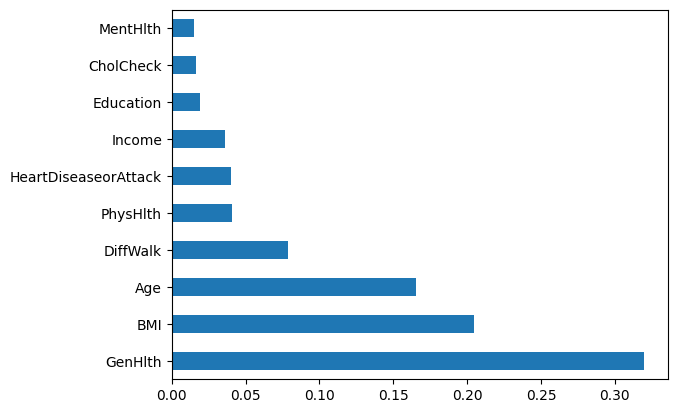

In [29]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state = 5).fit(X_train, y_train)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
FI_selected_features = feat_importances.nlargest(10).index
plt.show()

In [30]:
# Splitting feature importance
data_FI = pd.concat([y_train, X_train[FI_selected_features]], axis=1)

X_train_FI = data_FI.drop(columns=['Diabetes_binary'])
y_train_FI = data_FI['Diabetes_binary']

X_train_FI, X_test_FI, y_train_FI, y_test_FI = train_test_split(X_train_FI, y_train_FI, test_size = 0.2, random_state = 5)


C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.7242
AUC-ROC Score: 0.7243
Confusion Matrix:
[[4113 1637]
 [1483 4078]]
Precision: 0.7136
Recall: 0.7333
F1 Score: 0.7233
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73      5750
         1.0       0.71      0.73      0.72      5561

    accuracy                           0.72     11311
   macro avg       0.72      0.72      0.72     11311
weighted avg       0.72      0.72      0.72     11311



Model: RandomForestClassifier
Accuracy: 0.7343
AUC-ROC Score: 0.7351
Confusion Matrix:
[[3968 1782]
 [1223 4338]]
Precision: 0.7088
Recall: 0.7801
F1 Score: 0.7427
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      5750
         1.0       0.71      0.78      0.74      5561

    accuracy                           0.73     11311
   macro avg       0.74      0.74      0.73     11311
weighted avg       0.74      0.73      0.73     11311



Model: DecisionTre

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


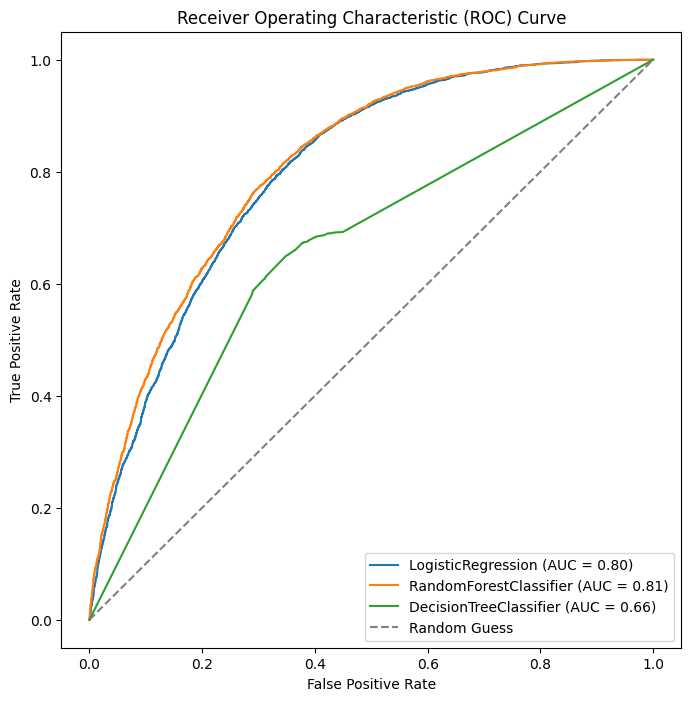

In [31]:
info(models, X_train_FI, y_train_FI, X_test_FI, y_test_FI)
ROC_curve(models, X_train_FI, y_train_FI, X_test_FI, y_test_FI)

#### Recursive feature elimination

In [32]:
estimator = RandomForestClassifier(n_estimators=100, max_depth=10, random_state = 5) # siia tuleb lõpuks valitud mudel
num_features_to_select = 10  
rfe = RFE(estimator, n_features_to_select=num_features_to_select)
X_selected = rfe.fit_transform(X_train, y_train)

selected_feature_indices = rfe.support_
RFE_selected_features = X_train.columns[selected_feature_indices]
print("Selected Features:", X_train.columns[selected_feature_indices])


Selected Features: Index(['CholCheck', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')


In [33]:
# Splitting recursive feature elimination
data_RFE = pd.concat([y_train, X_train[RFE_selected_features]], axis=1)

X_train_RFE = data_RFE.drop(columns=['Diabetes_binary'])
y_train_RFE = data_RFE['Diabetes_binary']

X_train_RFE, X_test_RFE, y_train_RFE, y_test_RFE = train_test_split(X_train_RFE, y_train_RFE, test_size = 0.2, random_state = 5)


C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.7242
AUC-ROC Score: 0.7243
Confusion Matrix:
[[4113 1637]
 [1483 4078]]
Precision: 0.7136
Recall: 0.7333
F1 Score: 0.7233
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73      5750
         1.0       0.71      0.73      0.72      5561

    accuracy                           0.72     11311
   macro avg       0.72      0.72      0.72     11311
weighted avg       0.72      0.72      0.72     11311



Model: RandomForestClassifier
Accuracy: 0.7340
AUC-ROC Score: 0.7347
Confusion Matrix:
[[3959 1791]
 [1218 4343]]
Precision: 0.7080
Recall: 0.7810
F1 Score: 0.7427
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      5750
         1.0       0.71      0.78      0.74      5561

    accuracy                           0.73     11311
   macro avg       0.74      0.73      0.73     11311
weighted avg       0.74      0.73      0.73     11311



Model: DecisionTre

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


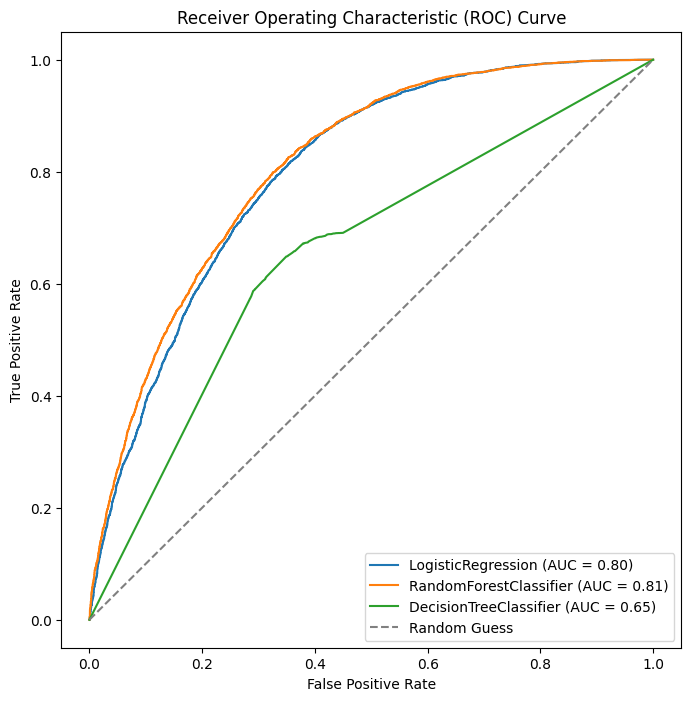

In [34]:
info(models, X_train_RFE, y_train_RFE,  X_test_RFE, y_test_RFE)
ROC_curve(models, X_train_RFE, y_train_RFE,  X_test_RFE, y_test_RFE)

#### All features

In [35]:
#Using all the features picked by the different feature selection techniques
all_FS = ['BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income','CholCheck',  'MentHlth']

data_all = pd.concat([y_train, X_train[all_FS]], axis=1)

X_train_all = data_all.drop(columns=['Diabetes_binary'])
y_train_all = data_all['Diabetes_binary']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_train_all, y_train_all, test_size = 0.2, random_state = 5)

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.7215
AUC-ROC Score: 0.7217
Confusion Matrix:
[[4097 1653]
 [1497 4064]]
Precision: 0.7109
Recall: 0.7308
F1 Score: 0.7207
              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72      5750
         1.0       0.71      0.73      0.72      5561

    accuracy                           0.72     11311
   macro avg       0.72      0.72      0.72     11311
weighted avg       0.72      0.72      0.72     11311



Model: RandomForestClassifier
Accuracy: 0.7337
AUC-ROC Score: 0.7345
Confusion Matrix:
[[3961 1789]
 [1223 4338]]
Precision: 0.7080
Recall: 0.7801
F1 Score: 0.7423
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      5750
         1.0       0.71      0.78      0.74      5561

    accuracy                           0.73     11311
   macro avg       0.74      0.73      0.73     11311
weighted avg       0.74      0.73      0.73     11311



Model: DecisionTre

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


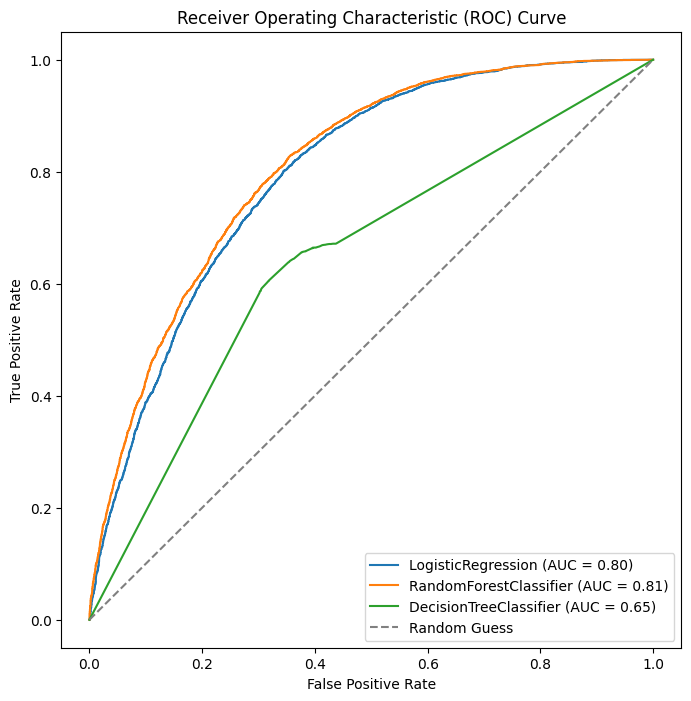

In [36]:
info(models, X_train_all, y_train_all,  X_test_all, y_test_all)
ROC_curve(models, X_train_all, y_train_all,  X_test_all, y_test_all)

#### Overlaping features

In [37]:
#Using the features that all three feature selection techniques have incommon
most_FS = ['BMI','HeartDiseaseorAttack','GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']
data_most = pd.concat([y_train, X_train[most_FS]], axis=1)

X_train_most = data_most.drop(columns=['Diabetes_binary'])
y_train_most = data_most['Diabetes_binary']

X_train_most, X_test_most, y_train_most, y_test_most = train_test_split(X_train_most, y_train_most, test_size = 0.2, random_state = 5)

Model: LogisticRegression
Accuracy: 0.7235
AUC-ROC Score: 0.7235
Confusion Matrix:
[[4134 1616]
 [1512 4049]]
Precision: 0.7147
Recall: 0.7281
F1 Score: 0.7214
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73      5750
         1.0       0.71      0.73      0.72      5561

    accuracy                           0.72     11311
   macro avg       0.72      0.72      0.72     11311
weighted avg       0.72      0.72      0.72     11311



Model: RandomForestClassifier
Accuracy: 0.7328
AUC-ROC Score: 0.7335
Confusion Matrix:
[[3981 1769]
 [1253 4308]]
Precision: 0.7089
Recall: 0.7747
F1 Score: 0.7403
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      5750
         1.0       0.71      0.77      0.74      5561

    accuracy                           0.73     11311
   macro avg       0.73      0.73      0.73     11311
weighted avg       0.74      0.73      0.73     11311



Model: DecisionTre

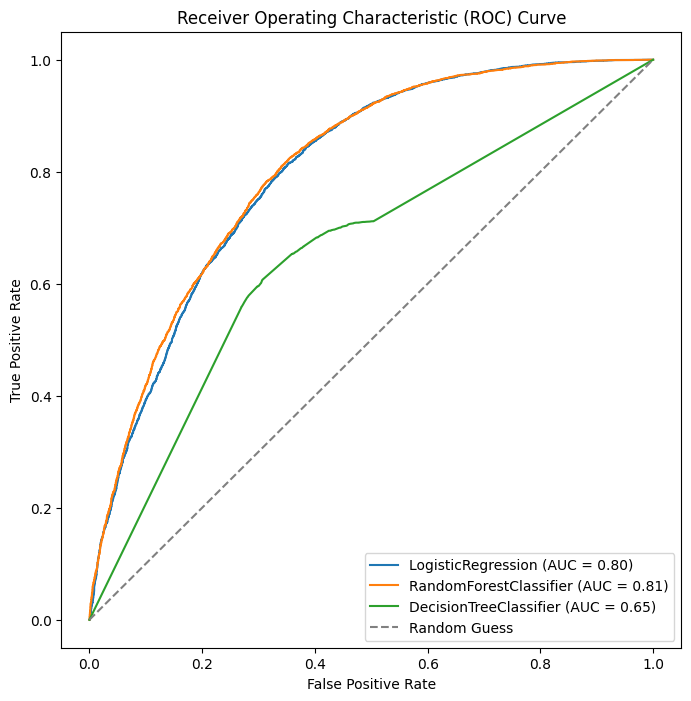

In [38]:
info(models, X_train_most, y_train_most, X_test_most, y_test_most)
ROC_curve(models, X_train_most, y_train_most, X_test_most, y_test_most)

## Joonised
